In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
runno = '7479'
f = open('/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/meshed_outputs_20210113/meshed_output_allfiles_'+runno+'_20210112.json')
histat_data = json.load(f)
f.close()

In [3]:
histat_data.keys()

dict_keys(['events_energy', 'events_prewindow_sums', 'all_Zgauss', 'all_Wgauss', 'all_Zrms', 'all_Wrms', 'events_X_sipm_subtracted', 'events_Y_sipm_subtracted', 'events_localit_X', 'events_localit_Y', 'events_local_X', 'events_local_Y', 'events_global_X', 'events_global_Y', 'ring_events_sipm_aroundevt', 'ring_events_sipm_aroundevt_noctr', 'all_R2', 'events_postwindow_sums', 'all_sres', 'all_ssres', 'all_cutoff'])

In [4]:
E = np.array(histat_data['events_energy']) - np.array(histat_data['events_prewindow_sums'])
Zrms = np.array(histat_data['all_Zrms'])
Zgauss = np.array(histat_data['all_Zgauss'])

In [5]:
x_msipm = np.array(histat_data['events_X_sipm_subtracted'])
x_glob = np.array(histat_data['events_global_X'])
x_loc = np.array(histat_data['events_local_X'])
x_locit = np.array(histat_data['events_localit_X'])
all_xs = [x_msipm, x_glob, x_loc, x_locit]

y_msipm = np.array(histat_data['events_Y_sipm_subtracted'])
y_glob = np.array(histat_data['events_global_Y'])
y_loc = np.array(histat_data['events_local_Y'])
y_locit = np.array(histat_data['events_localit_Y'])
all_ys = [y_msipm, y_glob, y_loc, y_locit]

In [6]:
maxx = np.maximum.reduce(all_xs)
minx = np.minimum.reduce(all_xs)
maxy = np.maximum.reduce(all_ys)
miny = np.minimum.reduce(all_ys)

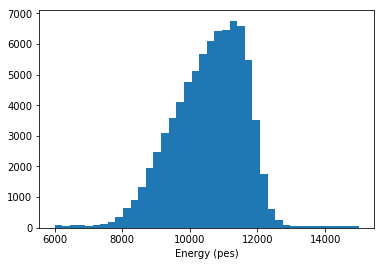

In [7]:
plt.hist(E[(Zgauss < 500) & (x_msipm**2 + y_msipm**2 < 180**2)], range = (6000, 15000), bins = 40)
plt.xlabel('Energy (pes)')
plt.show()

Erange = (7000, 13000)
Ecut = (E > Erange[0]) & (E < Erange[1])

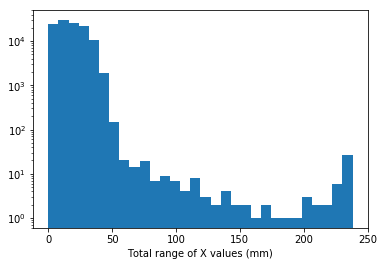

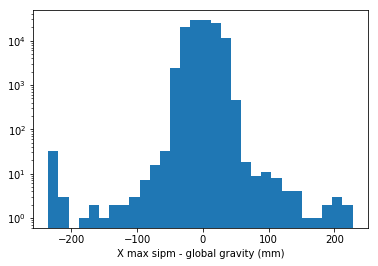

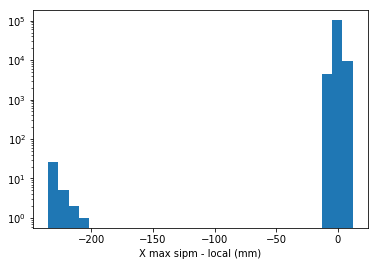

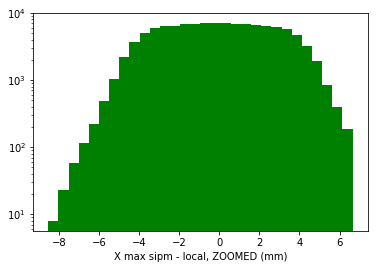

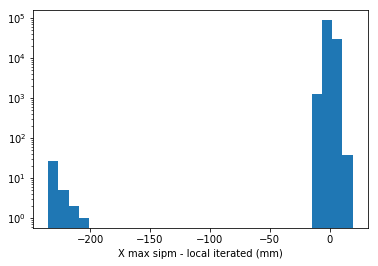

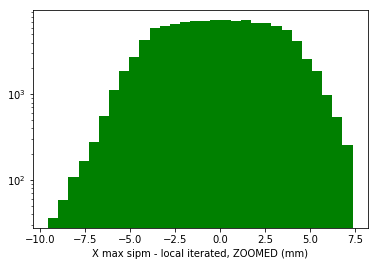

In [8]:
xminmax = maxx-minx
plt.hist(xminmax[Ecut], bins = 30)
plt.xlabel('Total range of X values (mm)')
plt.yscale('log')
plt.show()

xglob_diff = x_msipm-x_glob
plt.hist(xglob_diff[Ecut], bins = 30)
plt.xlabel('X max sipm - global gravity (mm)')
plt.yscale('log')
plt.show()

# Local X, normal and zoomed

xloc_diff = x_msipm-x_loc
plt.hist(xloc_diff[Ecut], bins = 30)
plt.xlabel('X max sipm - local (mm)')
plt.yscale('log')
plt.show()

xrloc = (np.percentile(xloc_diff,1), np.percentile(xloc_diff,99))
plt.hist(xloc_diff[Ecut], bins = 30, range = xrloc, color = 'g')
plt.xlabel('X max sipm - local, ZOOMED (mm)')
plt.yscale('log')
plt.show()

# Local iterated X, normal and zoomed

xlocit_diff = x_msipm - x_locit
plt.hist(xlocit_diff[Ecut], bins = 30)
plt.xlabel('X max sipm - local iterated (mm)')
plt.yscale('log')
plt.show()

xrlocit = (np.percentile(xlocit_diff,1), np.percentile(xlocit_diff,99))
plt.hist(xlocit_diff[Ecut], bins = 30, range = xrlocit, color = 'g')
plt.xlabel('X max sipm - local iterated, ZOOMED (mm)')
plt.yscale('log')
plt.show()

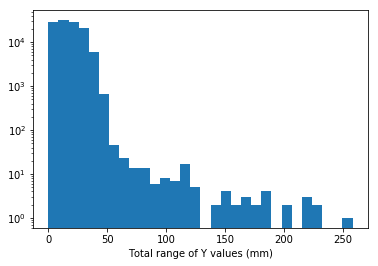

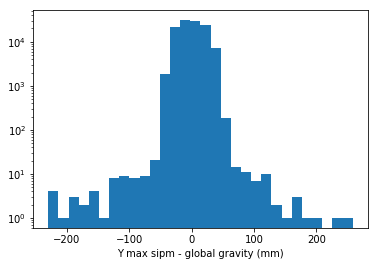

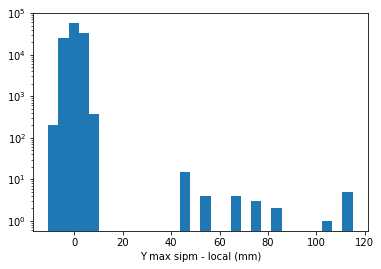

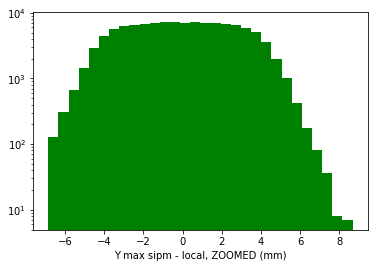

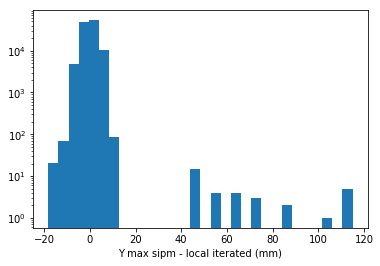

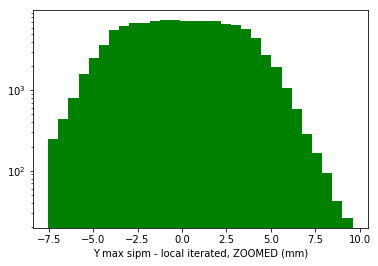

In [9]:
yminmax = maxy-miny
plt.hist(yminmax[Ecut], bins = 30)
plt.xlabel('Total range of Y values (mm)')
plt.yscale('log')
plt.show()

yglob_diff = y_msipm-y_glob
plt.hist(yglob_diff[Ecut], bins = 30)
plt.xlabel('Y max sipm - global gravity (mm)')
plt.yscale('log')
plt.show()

# Local X, normal and zoomed

yloc_diff = y_msipm-y_loc
plt.hist(yloc_diff[Ecut], bins = 30)
plt.xlabel('Y max sipm - local (mm)')
plt.yscale('log')
plt.show()

yrloc = (np.percentile(yloc_diff,1), np.percentile(yloc_diff,99))
plt.hist(yloc_diff[Ecut], bins = 30, range = yrloc, color = 'g')
plt.xlabel('Y max sipm - local, ZOOMED (mm)')
plt.yscale('log')
plt.show()

# Local iterated X, normal and zoomed

ylocit_diff = y_msipm - y_locit
plt.hist(ylocit_diff[Ecut], bins = 30)
plt.xlabel('Y max sipm - local iterated (mm)')
plt.yscale('log')
plt.show()

yrlocit = (np.percentile(ylocit_diff,1), np.percentile(ylocit_diff,99))
plt.hist(ylocit_diff[Ecut], bins = 30, range = yrlocit, color = 'g')
plt.xlabel('Y max sipm - local iterated, ZOOMED (mm)')
plt.yscale('log')
plt.show()

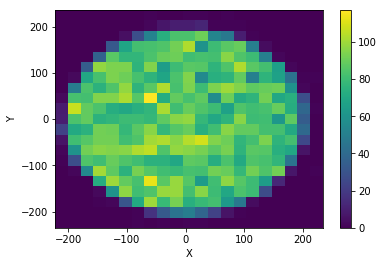

In [18]:
zcut = Zgauss < 100
h = plt.hist2d(x_loc[Ecut & zcut], y_loc[Ecut & zcut], bins = 21)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(h[3])
plt.show()

In [65]:
Xedges = np.round(np.linspace(-200, 200, 20))
Yedges = np.round(np.linspace(-200, 200, 20))
xbins, ybins = np.array([Xedges[:-1], Xedges[1:]]).T, np.array([Yedges[:-1], Yedges[1:]]).T
print(Xedges)

[-200. -179. -158. -137. -116.  -95.  -74.  -53.  -32.  -11.   11.   32.
   53.   74.   95.  116.  137.  158.  179.  200.]


In [31]:
# xbins, ybins = np.array([h[1][:-1], h[1][1:]]).T, np.array([h[2][:-1], h[2][1:]]).T

xbin, ybin = [-178.36758118 -156.6113927 ] , [-11.19047619  11.19047619]


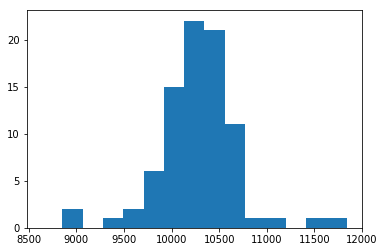

xbin, ybin = [-156.6113927  -134.85520421] , [-78.33333333 -55.95238095]


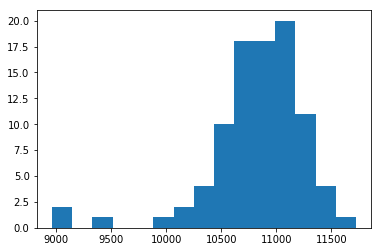

xbin, ybin = [-156.6113927  -134.85520421] , [-55.95238095 -33.57142857]


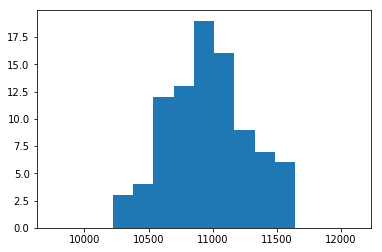

xbin, ybin = [-156.6113927  -134.85520421] , [-33.57142857 -11.19047619]


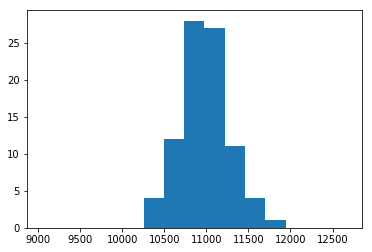

xbin, ybin = [-156.6113927  -134.85520421] , [-11.19047619  11.19047619]


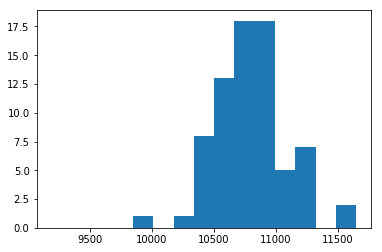

xbin, ybin = [-156.6113927  -134.85520421] , [11.19047619 33.57142857]


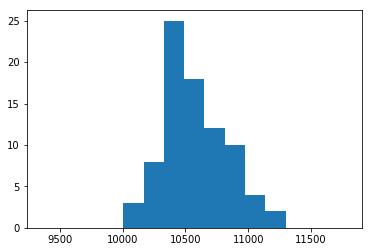

xbin, ybin = [-156.6113927  -134.85520421] , [33.57142857 55.95238095]


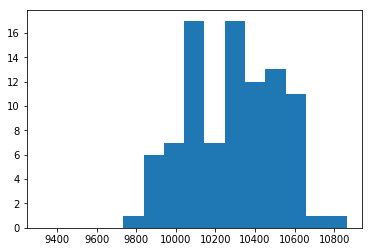

xbin, ybin = [-156.6113927  -134.85520421] , [55.95238095 78.33333333]


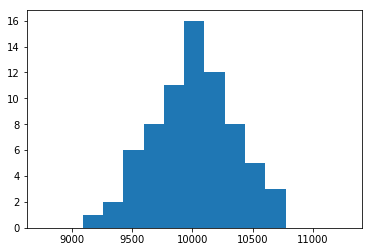

xbin, ybin = [-134.85520421 -113.09901573] , [-100.71428571  -78.33333333]


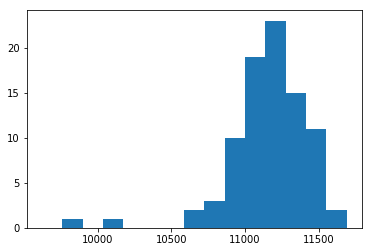

xbin, ybin = [-134.85520421 -113.09901573] , [-78.33333333 -55.95238095]


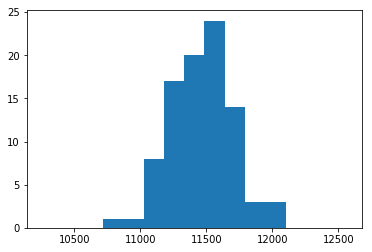

xbin, ybin = [-134.85520421 -113.09901573] , [-55.95238095 -33.57142857]


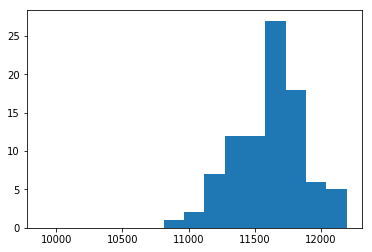

xbin, ybin = [-134.85520421 -113.09901573] , [-33.57142857 -11.19047619]


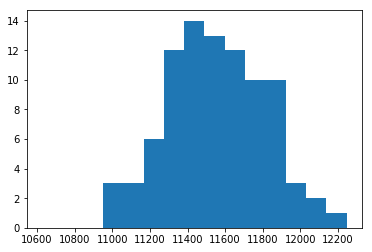

xbin, ybin = [-134.85520421 -113.09901573] , [-11.19047619  11.19047619]


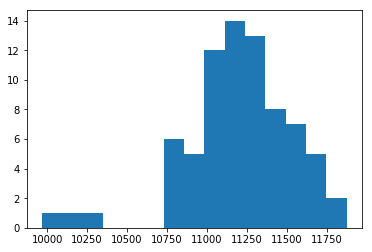

xbin, ybin = [-134.85520421 -113.09901573] , [11.19047619 33.57142857]


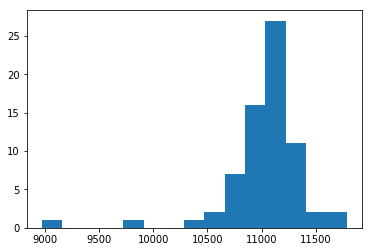

xbin, ybin = [-134.85520421 -113.09901573] , [33.57142857 55.95238095]


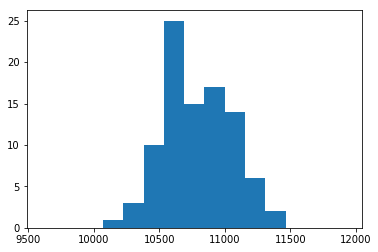

xbin, ybin = [-134.85520421 -113.09901573] , [55.95238095 78.33333333]


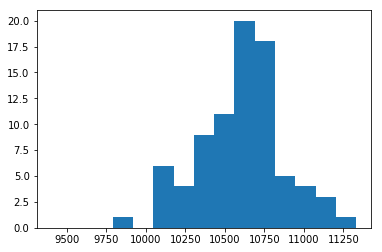

xbin, ybin = [-134.85520421 -113.09901573] , [ 78.33333333 100.71428571]


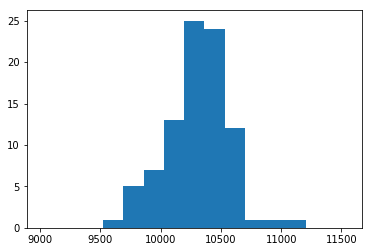

xbin, ybin = [-113.09901573  -91.34282725] , [-123.0952381  -100.71428571]


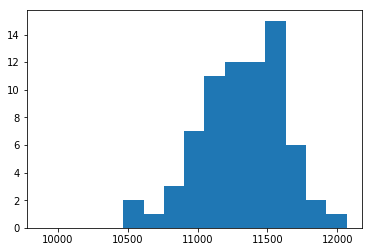

xbin, ybin = [-113.09901573  -91.34282725] , [-100.71428571  -78.33333333]


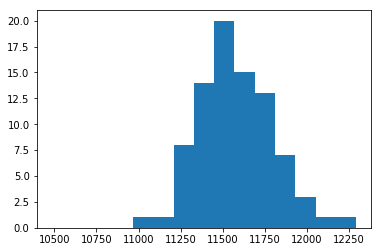

xbin, ybin = [-113.09901573  -91.34282725] , [-78.33333333 -55.95238095]


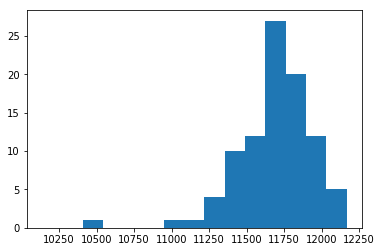

xbin, ybin = [-113.09901573  -91.34282725] , [-55.95238095 -33.57142857]


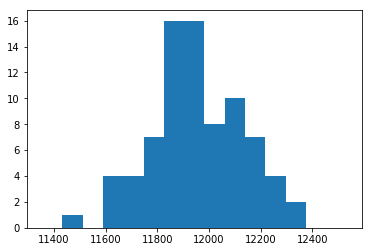

xbin, ybin = [-113.09901573  -91.34282725] , [-33.57142857 -11.19047619]


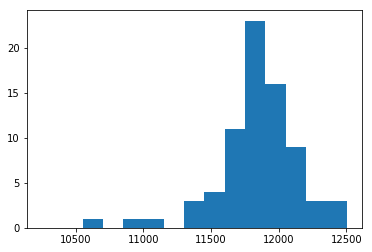

xbin, ybin = [-113.09901573  -91.34282725] , [-11.19047619  11.19047619]


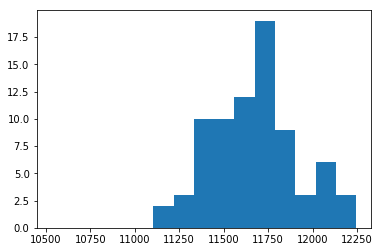

xbin, ybin = [-113.09901573  -91.34282725] , [11.19047619 33.57142857]


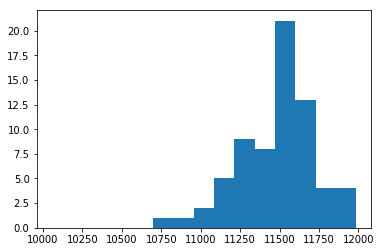

xbin, ybin = [-113.09901573  -91.34282725] , [33.57142857 55.95238095]


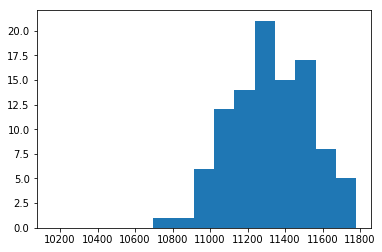

xbin, ybin = [-113.09901573  -91.34282725] , [55.95238095 78.33333333]


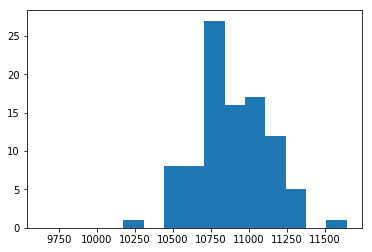

xbin, ybin = [-113.09901573  -91.34282725] , [ 78.33333333 100.71428571]


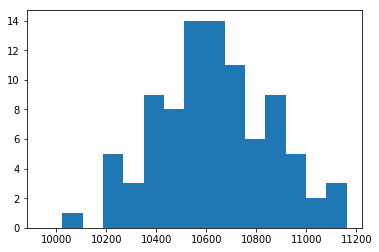

xbin, ybin = [-113.09901573  -91.34282725] , [100.71428571 123.0952381 ]


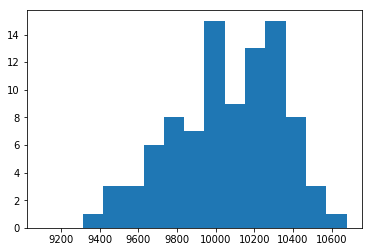

xbin, ybin = [-91.34282725 -69.58663876] , [-145.47619048 -123.0952381 ]


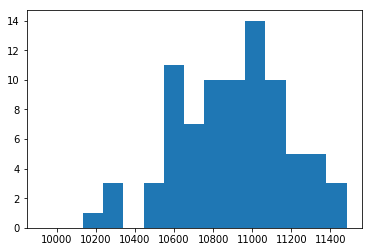

xbin, ybin = [-91.34282725 -69.58663876] , [-123.0952381  -100.71428571]


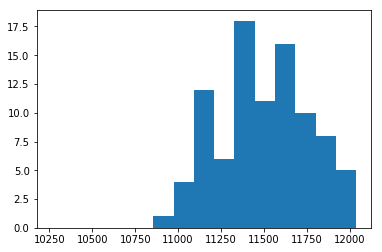

xbin, ybin = [-91.34282725 -69.58663876] , [-100.71428571  -78.33333333]


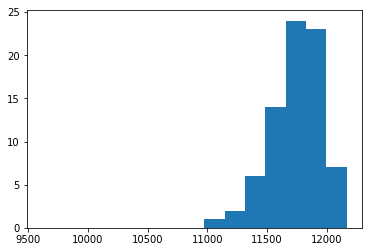

xbin, ybin = [-91.34282725 -69.58663876] , [-78.33333333 -55.95238095]


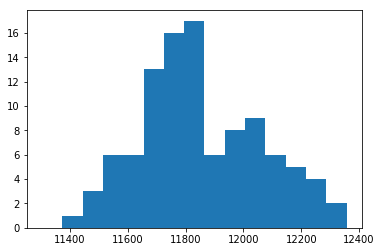

xbin, ybin = [-91.34282725 -69.58663876] , [-55.95238095 -33.57142857]


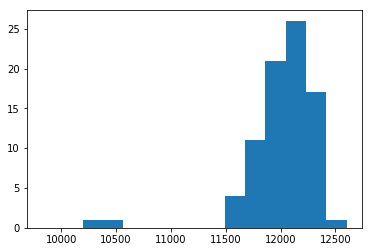

xbin, ybin = [-91.34282725 -69.58663876] , [-33.57142857 -11.19047619]


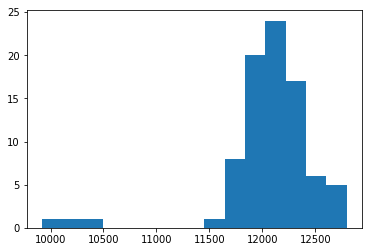

xbin, ybin = [-91.34282725 -69.58663876] , [-11.19047619  11.19047619]


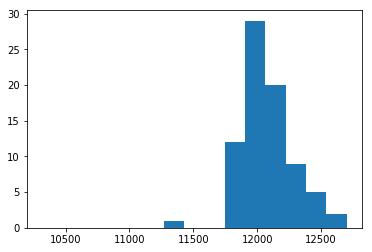

xbin, ybin = [-91.34282725 -69.58663876] , [11.19047619 33.57142857]


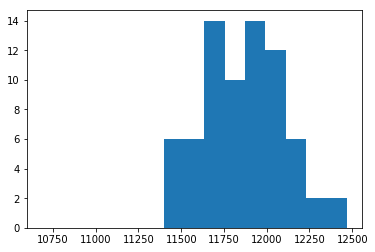

xbin, ybin = [-91.34282725 -69.58663876] , [33.57142857 55.95238095]


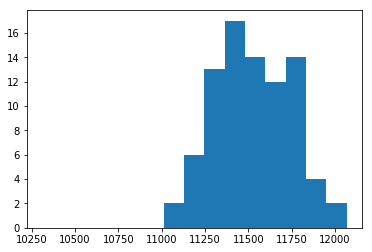

xbin, ybin = [-91.34282725 -69.58663876] , [55.95238095 78.33333333]


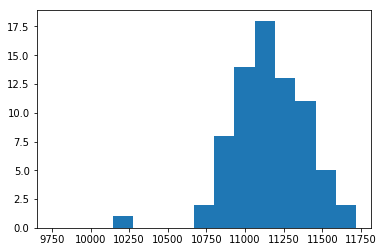

xbin, ybin = [-91.34282725 -69.58663876] , [ 78.33333333 100.71428571]


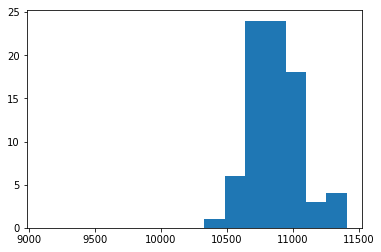

xbin, ybin = [-91.34282725 -69.58663876] , [100.71428571 123.0952381 ]


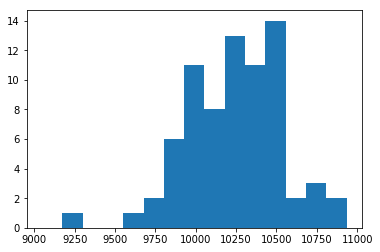

xbin, ybin = [-91.34282725 -69.58663876] , [123.0952381  145.47619048]


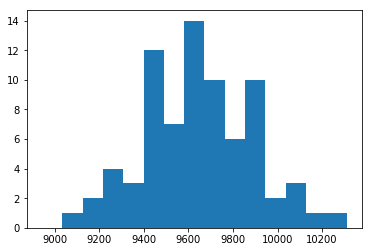

xbin, ybin = [-69.58663876 -47.83045028] , [-145.47619048 -123.0952381 ]


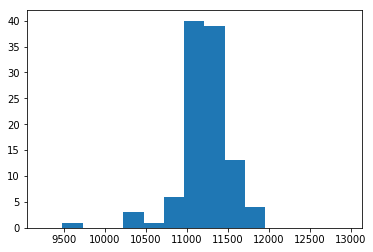

xbin, ybin = [-69.58663876 -47.83045028] , [-123.0952381  -100.71428571]


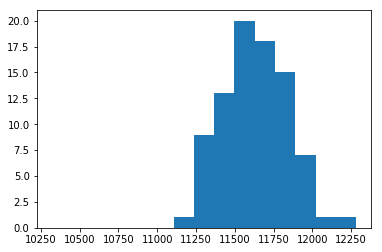

xbin, ybin = [-69.58663876 -47.83045028] , [-100.71428571  -78.33333333]


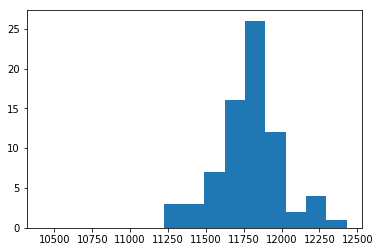

xbin, ybin = [-69.58663876 -47.83045028] , [-78.33333333 -55.95238095]


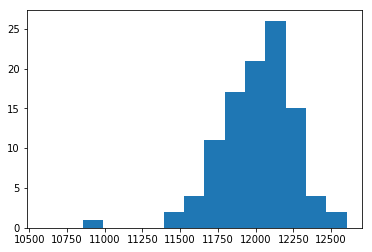

xbin, ybin = [-69.58663876 -47.83045028] , [-55.95238095 -33.57142857]


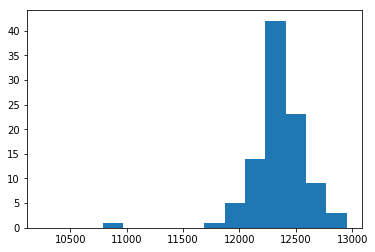

xbin, ybin = [-69.58663876 -47.83045028] , [-33.57142857 -11.19047619]


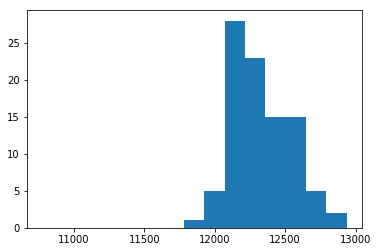

xbin, ybin = [-69.58663876 -47.83045028] , [-11.19047619  11.19047619]


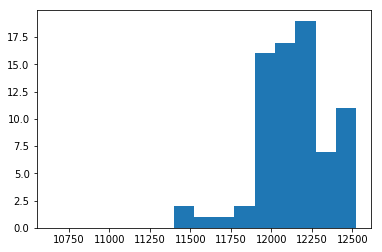

xbin, ybin = [-69.58663876 -47.83045028] , [11.19047619 33.57142857]


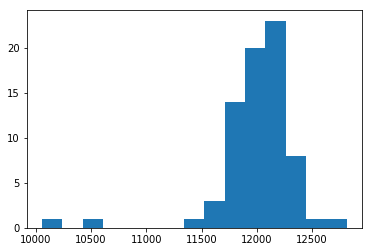

xbin, ybin = [-69.58663876 -47.83045028] , [33.57142857 55.95238095]


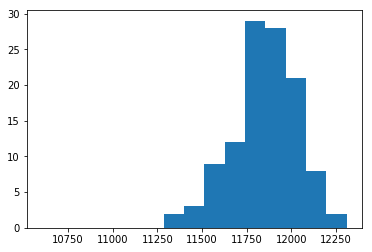

xbin, ybin = [-69.58663876 -47.83045028] , [55.95238095 78.33333333]


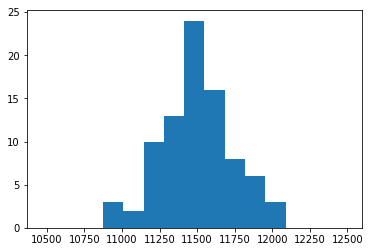

xbin, ybin = [-69.58663876 -47.83045028] , [ 78.33333333 100.71428571]


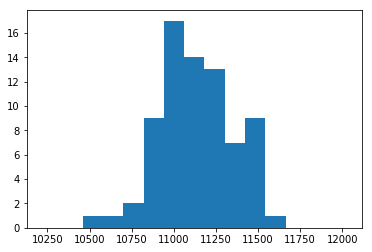

xbin, ybin = [-69.58663876 -47.83045028] , [100.71428571 123.0952381 ]


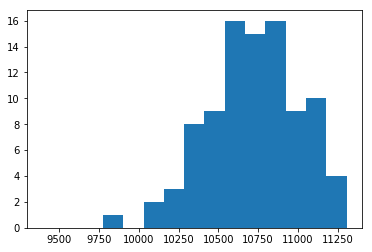

xbin, ybin = [-69.58663876 -47.83045028] , [123.0952381  145.47619048]


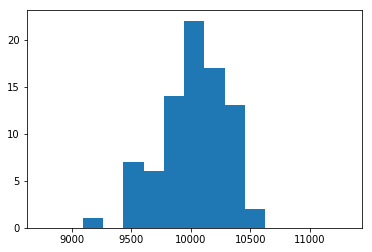

xbin, ybin = [-47.83045028 -26.0742618 ] , [-167.85714286 -145.47619048]


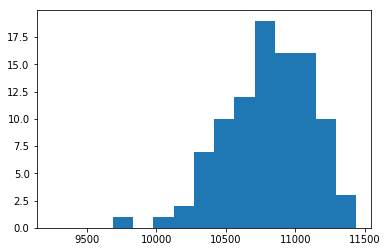

xbin, ybin = [-47.83045028 -26.0742618 ] , [-145.47619048 -123.0952381 ]


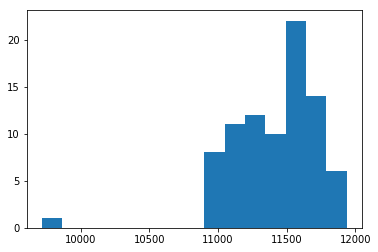

xbin, ybin = [-47.83045028 -26.0742618 ] , [-123.0952381  -100.71428571]


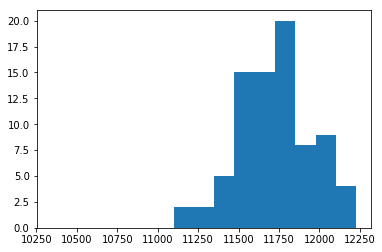

xbin, ybin = [-47.83045028 -26.0742618 ] , [-100.71428571  -78.33333333]


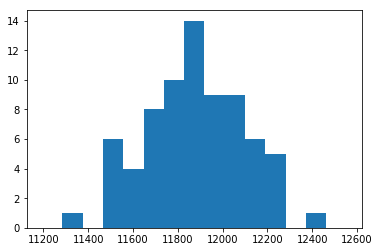

xbin, ybin = [-47.83045028 -26.0742618 ] , [-78.33333333 -55.95238095]


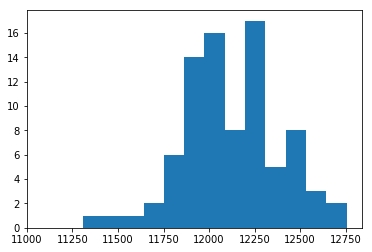

xbin, ybin = [-47.83045028 -26.0742618 ] , [-55.95238095 -33.57142857]


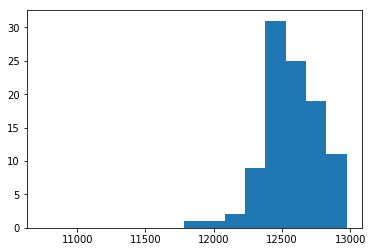

xbin, ybin = [-47.83045028 -26.0742618 ] , [-33.57142857 -11.19047619]


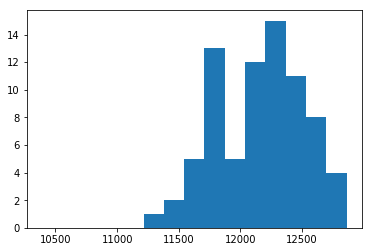

xbin, ybin = [-47.83045028 -26.0742618 ] , [-11.19047619  11.19047619]


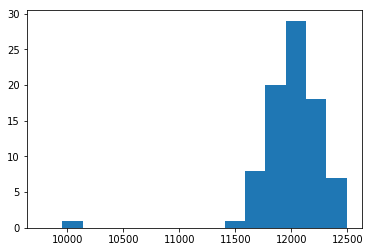

xbin, ybin = [-47.83045028 -26.0742618 ] , [11.19047619 33.57142857]


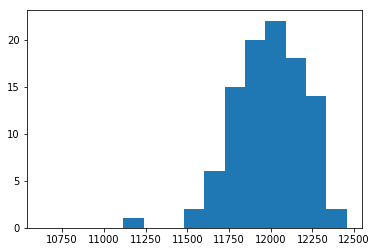

xbin, ybin = [-47.83045028 -26.0742618 ] , [33.57142857 55.95238095]


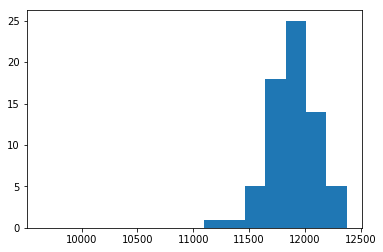

xbin, ybin = [-47.83045028 -26.0742618 ] , [55.95238095 78.33333333]


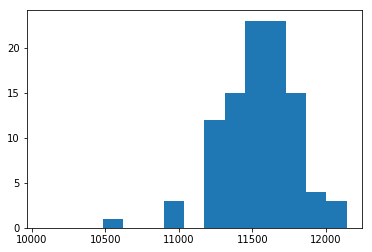

xbin, ybin = [-47.83045028 -26.0742618 ] , [ 78.33333333 100.71428571]


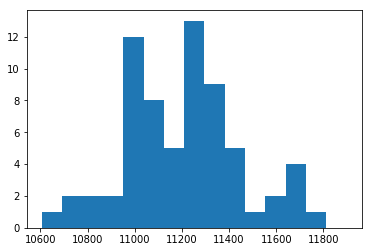

xbin, ybin = [-47.83045028 -26.0742618 ] , [100.71428571 123.0952381 ]


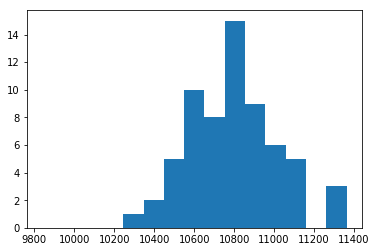

xbin, ybin = [-47.83045028 -26.0742618 ] , [123.0952381  145.47619048]


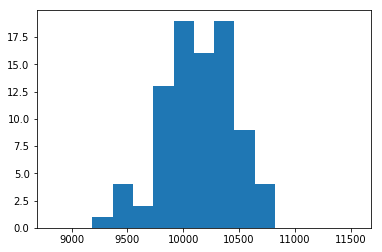

xbin, ybin = [-47.83045028 -26.0742618 ] , [145.47619048 167.85714286]


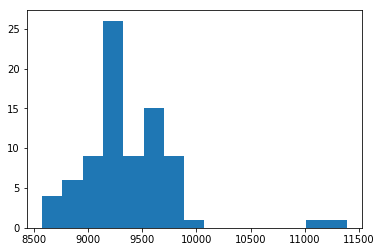

xbin, ybin = [-26.0742618   -4.31807332] , [-167.85714286 -145.47619048]


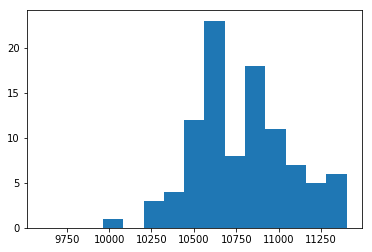

xbin, ybin = [-26.0742618   -4.31807332] , [-145.47619048 -123.0952381 ]


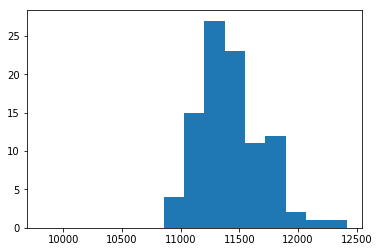

xbin, ybin = [-26.0742618   -4.31807332] , [-123.0952381  -100.71428571]


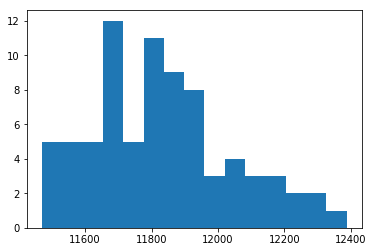

xbin, ybin = [-26.0742618   -4.31807332] , [-100.71428571  -78.33333333]


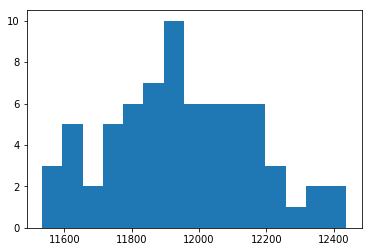

xbin, ybin = [-26.0742618   -4.31807332] , [-78.33333333 -55.95238095]


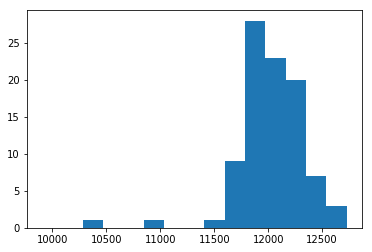

xbin, ybin = [-26.0742618   -4.31807332] , [-55.95238095 -33.57142857]


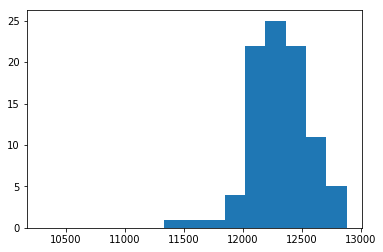

xbin, ybin = [-26.0742618   -4.31807332] , [-33.57142857 -11.19047619]


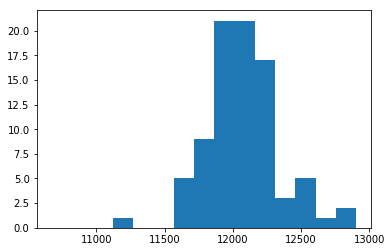

xbin, ybin = [-26.0742618   -4.31807332] , [-11.19047619  11.19047619]


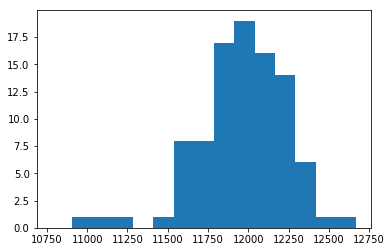

xbin, ybin = [-26.0742618   -4.31807332] , [11.19047619 33.57142857]


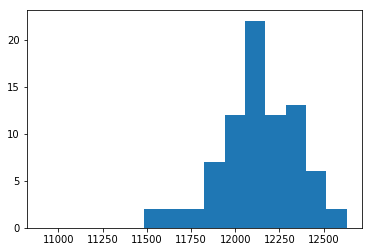

xbin, ybin = [-26.0742618   -4.31807332] , [33.57142857 55.95238095]


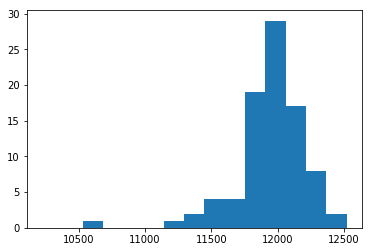

xbin, ybin = [-26.0742618   -4.31807332] , [55.95238095 78.33333333]


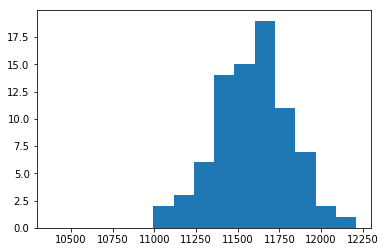

xbin, ybin = [-26.0742618   -4.31807332] , [ 78.33333333 100.71428571]


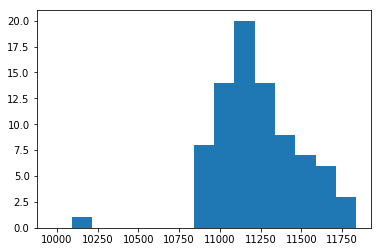

xbin, ybin = [-26.0742618   -4.31807332] , [100.71428571 123.0952381 ]


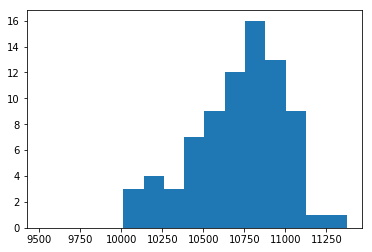

xbin, ybin = [-26.0742618   -4.31807332] , [123.0952381  145.47619048]


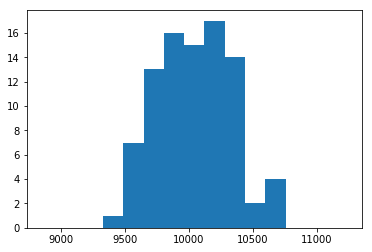

xbin, ybin = [-26.0742618   -4.31807332] , [145.47619048 167.85714286]


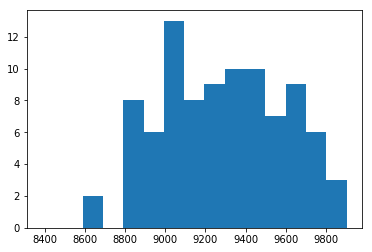

xbin, ybin = [-4.31807332 17.43811517] , [-167.85714286 -145.47619048]


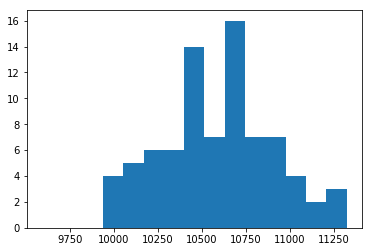

xbin, ybin = [-4.31807332 17.43811517] , [-145.47619048 -123.0952381 ]


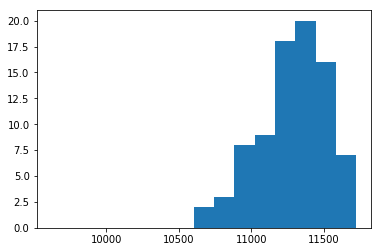

xbin, ybin = [-4.31807332 17.43811517] , [-123.0952381  -100.71428571]


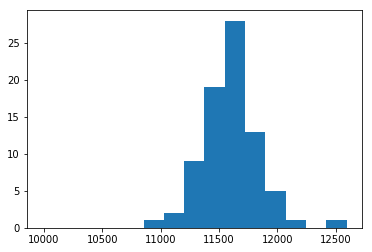

xbin, ybin = [-4.31807332 17.43811517] , [-100.71428571  -78.33333333]


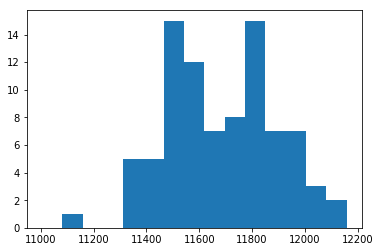

xbin, ybin = [-4.31807332 17.43811517] , [-78.33333333 -55.95238095]


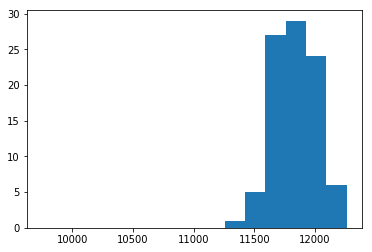

xbin, ybin = [-4.31807332 17.43811517] , [-55.95238095 -33.57142857]


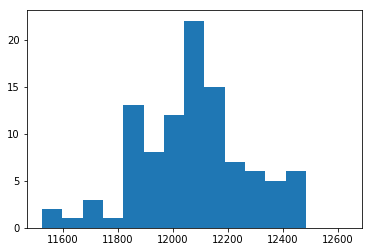

xbin, ybin = [-4.31807332 17.43811517] , [-33.57142857 -11.19047619]


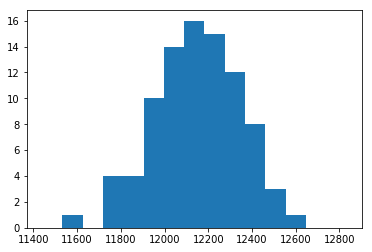

xbin, ybin = [-4.31807332 17.43811517] , [-11.19047619  11.19047619]


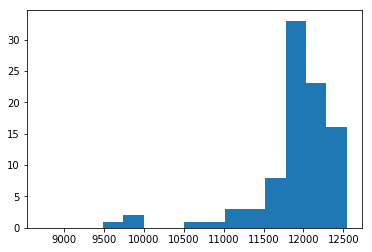

xbin, ybin = [-4.31807332 17.43811517] , [11.19047619 33.57142857]


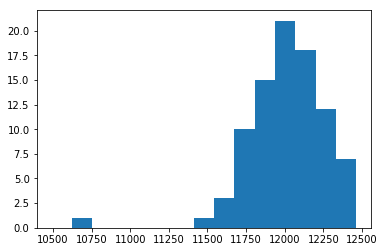

xbin, ybin = [-4.31807332 17.43811517] , [33.57142857 55.95238095]


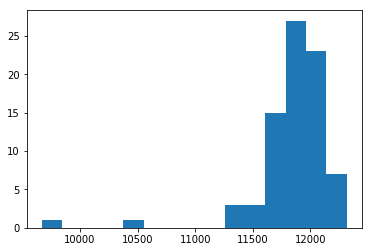

xbin, ybin = [-4.31807332 17.43811517] , [55.95238095 78.33333333]


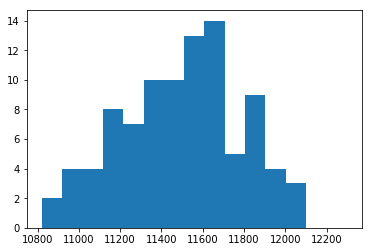

xbin, ybin = [-4.31807332 17.43811517] , [ 78.33333333 100.71428571]


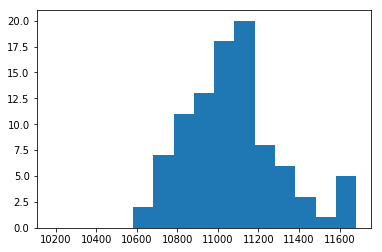

xbin, ybin = [-4.31807332 17.43811517] , [100.71428571 123.0952381 ]


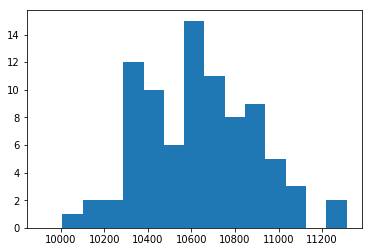

xbin, ybin = [-4.31807332 17.43811517] , [123.0952381  145.47619048]


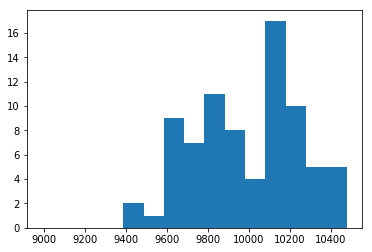

xbin, ybin = [-4.31807332 17.43811517] , [145.47619048 167.85714286]


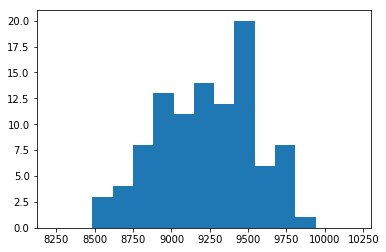

xbin, ybin = [17.43811517 39.19430365] , [-167.85714286 -145.47619048]


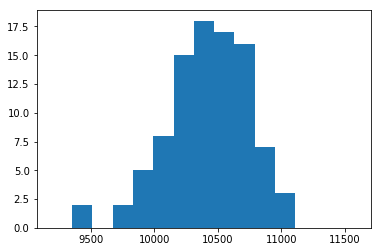

xbin, ybin = [17.43811517 39.19430365] , [-145.47619048 -123.0952381 ]


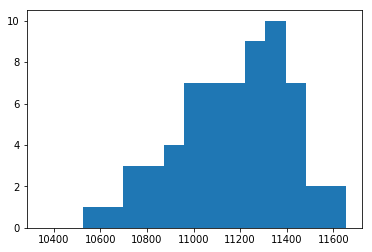

xbin, ybin = [17.43811517 39.19430365] , [-123.0952381  -100.71428571]


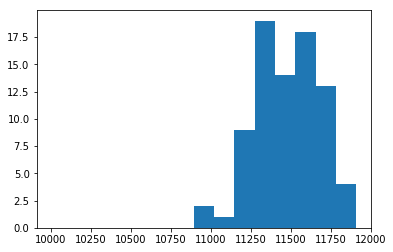

xbin, ybin = [17.43811517 39.19430365] , [-100.71428571  -78.33333333]


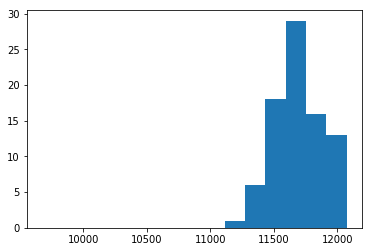

xbin, ybin = [17.43811517 39.19430365] , [-78.33333333 -55.95238095]


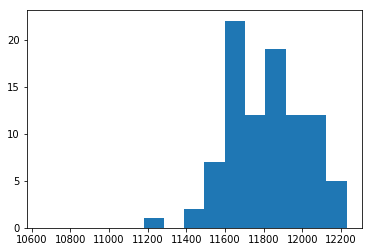

xbin, ybin = [17.43811517 39.19430365] , [-55.95238095 -33.57142857]


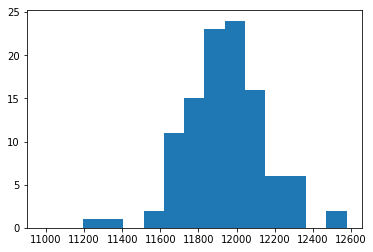

xbin, ybin = [17.43811517 39.19430365] , [-33.57142857 -11.19047619]


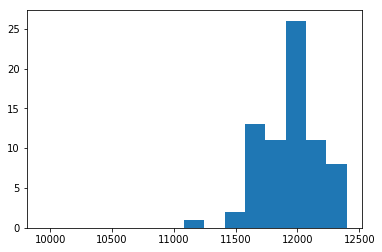

xbin, ybin = [17.43811517 39.19430365] , [-11.19047619  11.19047619]


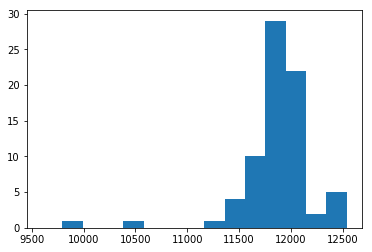

xbin, ybin = [17.43811517 39.19430365] , [11.19047619 33.57142857]


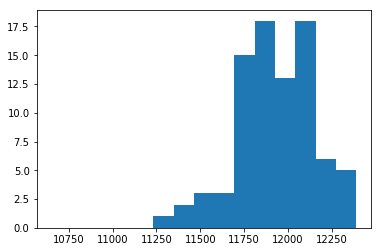

xbin, ybin = [17.43811517 39.19430365] , [33.57142857 55.95238095]


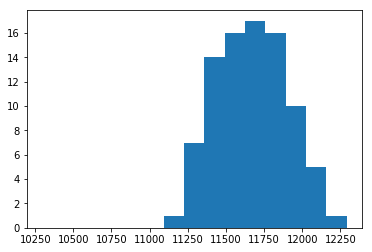

xbin, ybin = [17.43811517 39.19430365] , [55.95238095 78.33333333]


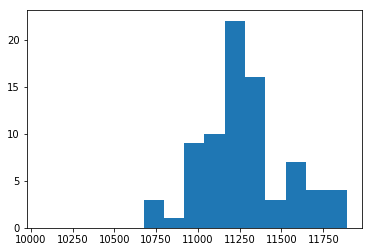

xbin, ybin = [17.43811517 39.19430365] , [ 78.33333333 100.71428571]


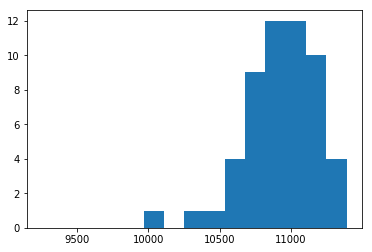

xbin, ybin = [17.43811517 39.19430365] , [100.71428571 123.0952381 ]


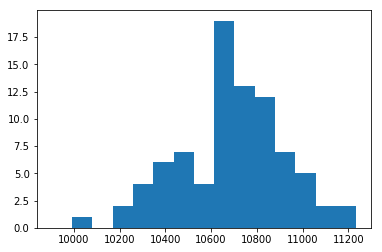

xbin, ybin = [17.43811517 39.19430365] , [123.0952381  145.47619048]


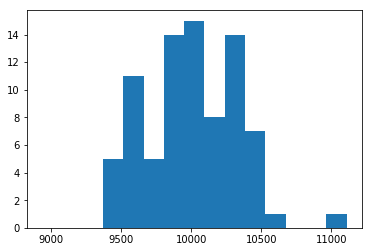

xbin, ybin = [17.43811517 39.19430365] , [145.47619048 167.85714286]


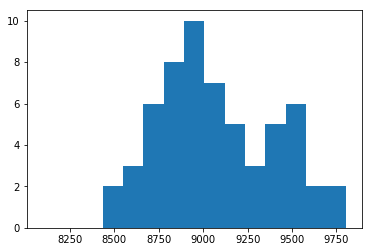

xbin, ybin = [39.19430365 60.95049213] , [-167.85714286 -145.47619048]


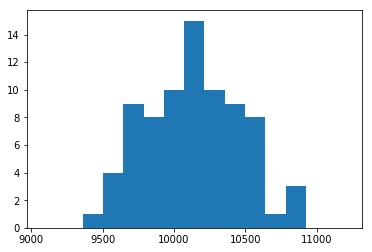

xbin, ybin = [39.19430365 60.95049213] , [-145.47619048 -123.0952381 ]


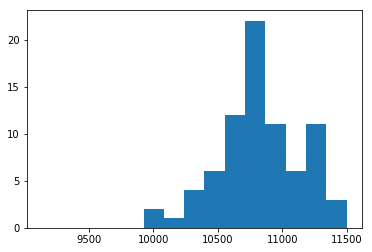

xbin, ybin = [39.19430365 60.95049213] , [-123.0952381  -100.71428571]


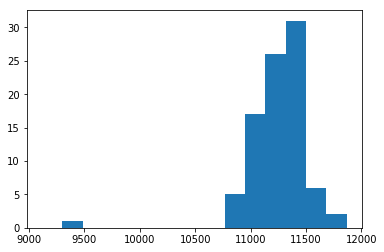

xbin, ybin = [39.19430365 60.95049213] , [-100.71428571  -78.33333333]


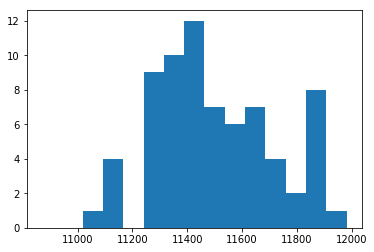

xbin, ybin = [39.19430365 60.95049213] , [-78.33333333 -55.95238095]


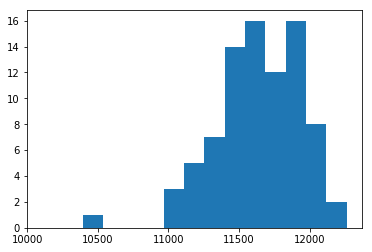

xbin, ybin = [39.19430365 60.95049213] , [-55.95238095 -33.57142857]


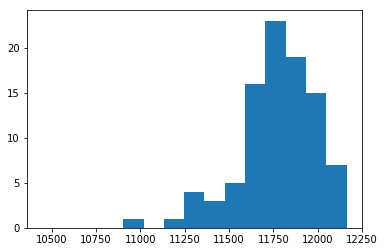

xbin, ybin = [39.19430365 60.95049213] , [-33.57142857 -11.19047619]


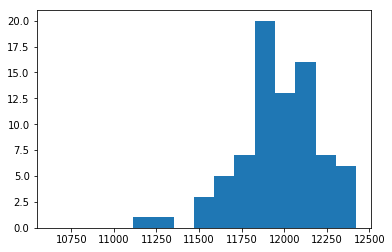

xbin, ybin = [39.19430365 60.95049213] , [-11.19047619  11.19047619]


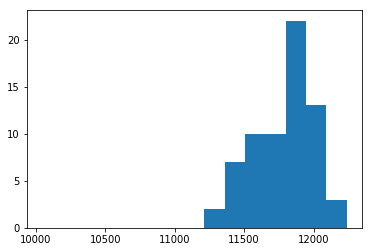

xbin, ybin = [39.19430365 60.95049213] , [11.19047619 33.57142857]


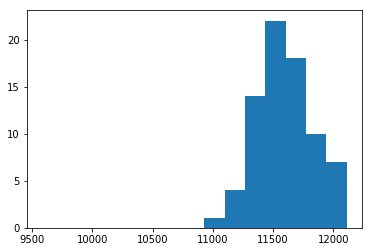

xbin, ybin = [39.19430365 60.95049213] , [33.57142857 55.95238095]


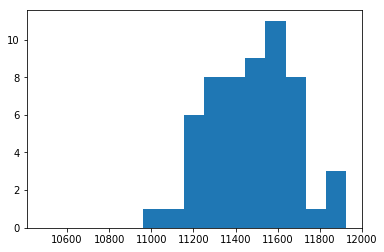

xbin, ybin = [39.19430365 60.95049213] , [55.95238095 78.33333333]


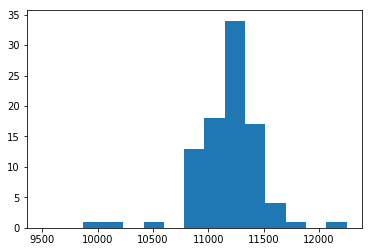

xbin, ybin = [39.19430365 60.95049213] , [ 78.33333333 100.71428571]


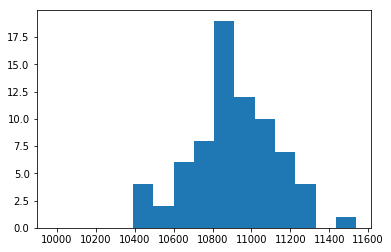

xbin, ybin = [39.19430365 60.95049213] , [100.71428571 123.0952381 ]


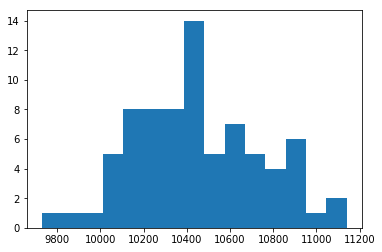

xbin, ybin = [39.19430365 60.95049213] , [123.0952381  145.47619048]


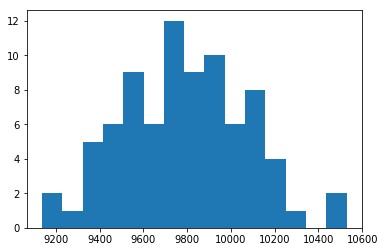

xbin, ybin = [39.19430365 60.95049213] , [145.47619048 167.85714286]


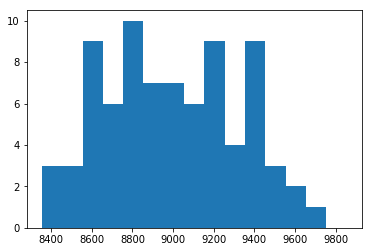

xbin, ybin = [60.95049213 82.70668062] , [-145.47619048 -123.0952381 ]


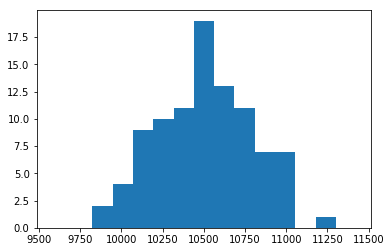

xbin, ybin = [60.95049213 82.70668062] , [-123.0952381  -100.71428571]


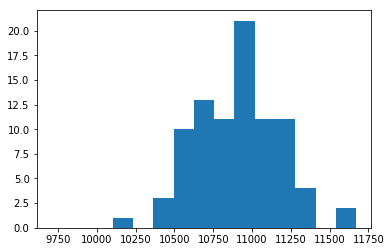

xbin, ybin = [60.95049213 82.70668062] , [-100.71428571  -78.33333333]


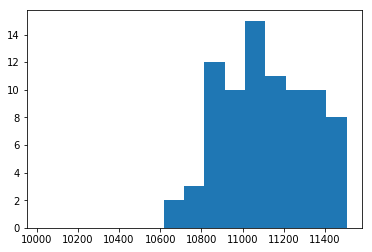

xbin, ybin = [60.95049213 82.70668062] , [-78.33333333 -55.95238095]


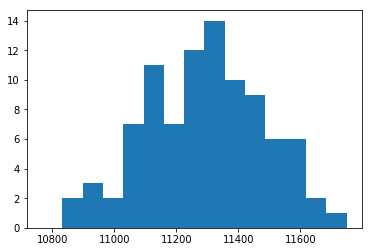

xbin, ybin = [60.95049213 82.70668062] , [-55.95238095 -33.57142857]


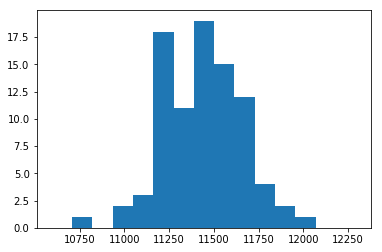

xbin, ybin = [60.95049213 82.70668062] , [-33.57142857 -11.19047619]


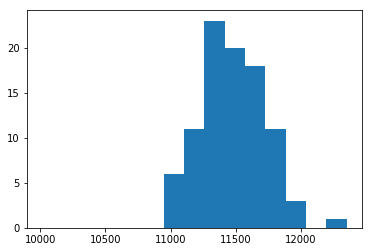

xbin, ybin = [60.95049213 82.70668062] , [-11.19047619  11.19047619]


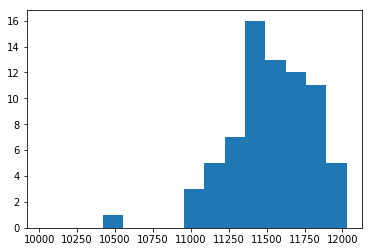

xbin, ybin = [60.95049213 82.70668062] , [11.19047619 33.57142857]


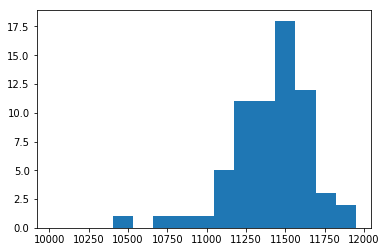

xbin, ybin = [60.95049213 82.70668062] , [33.57142857 55.95238095]


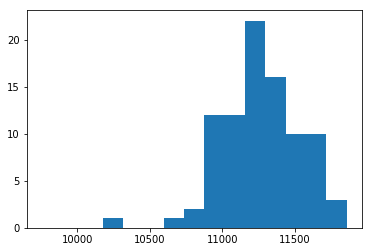

xbin, ybin = [60.95049213 82.70668062] , [55.95238095 78.33333333]


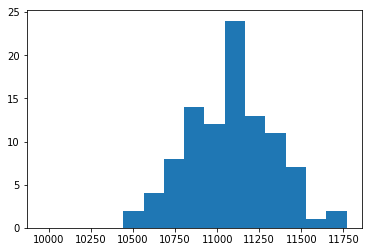

xbin, ybin = [60.95049213 82.70668062] , [ 78.33333333 100.71428571]


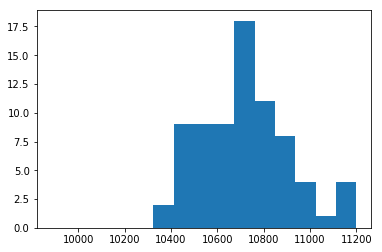

xbin, ybin = [60.95049213 82.70668062] , [100.71428571 123.0952381 ]


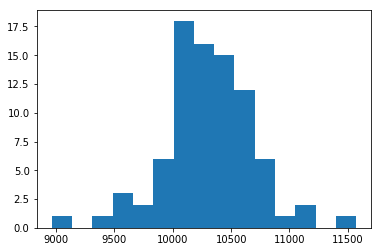

xbin, ybin = [60.95049213 82.70668062] , [123.0952381  145.47619048]


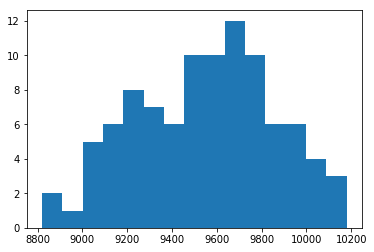

xbin, ybin = [ 82.70668062 104.4628691 ] , [-145.47619048 -123.0952381 ]


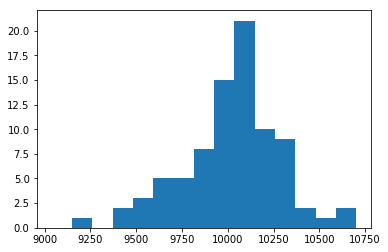

xbin, ybin = [ 82.70668062 104.4628691 ] , [-123.0952381  -100.71428571]


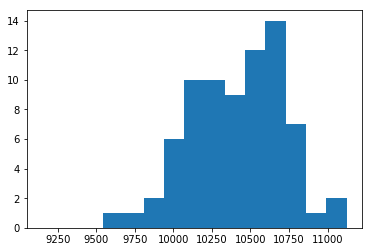

xbin, ybin = [ 82.70668062 104.4628691 ] , [-100.71428571  -78.33333333]


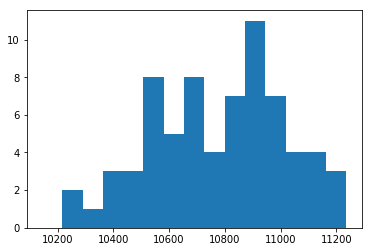

xbin, ybin = [ 82.70668062 104.4628691 ] , [-78.33333333 -55.95238095]


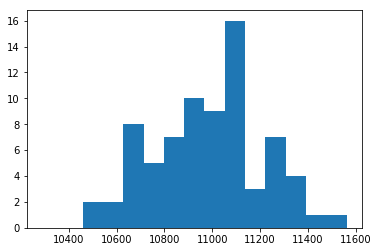

xbin, ybin = [ 82.70668062 104.4628691 ] , [-55.95238095 -33.57142857]


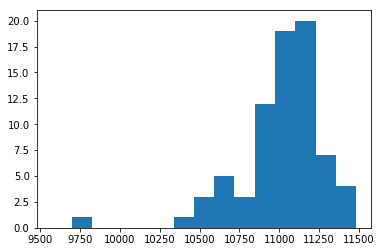

xbin, ybin = [ 82.70668062 104.4628691 ] , [-33.57142857 -11.19047619]


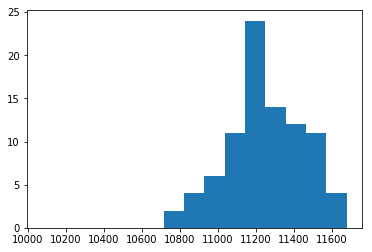

xbin, ybin = [ 82.70668062 104.4628691 ] , [-11.19047619  11.19047619]


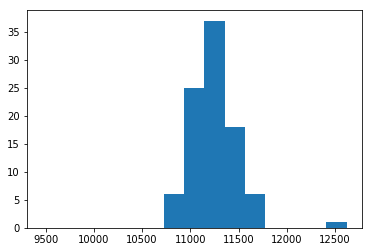

xbin, ybin = [ 82.70668062 104.4628691 ] , [11.19047619 33.57142857]


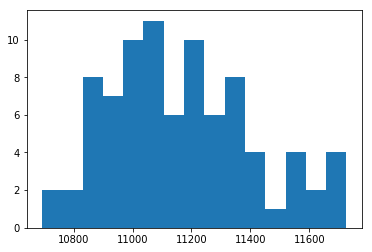

xbin, ybin = [ 82.70668062 104.4628691 ] , [33.57142857 55.95238095]


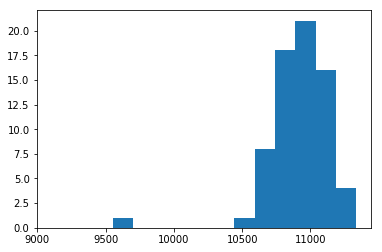

xbin, ybin = [ 82.70668062 104.4628691 ] , [55.95238095 78.33333333]


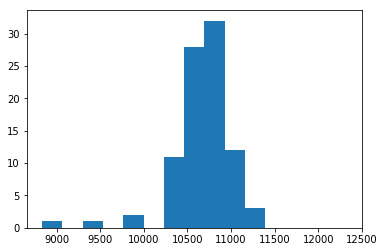

xbin, ybin = [ 82.70668062 104.4628691 ] , [ 78.33333333 100.71428571]


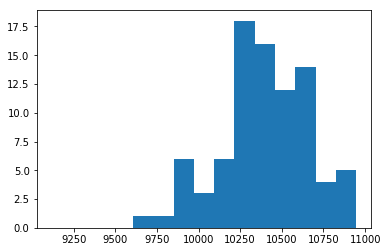

xbin, ybin = [ 82.70668062 104.4628691 ] , [100.71428571 123.0952381 ]


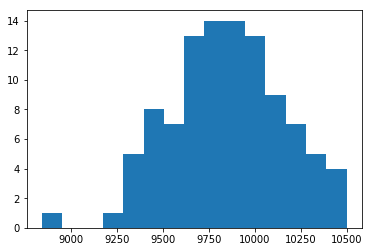

xbin, ybin = [ 82.70668062 104.4628691 ] , [123.0952381  145.47619048]


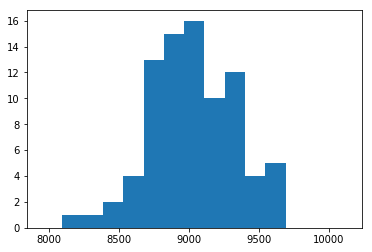

xbin, ybin = [104.4628691  126.21905758] , [-123.0952381  -100.71428571]


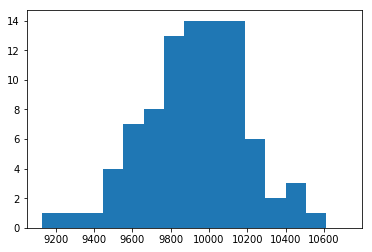

xbin, ybin = [104.4628691  126.21905758] , [-100.71428571  -78.33333333]


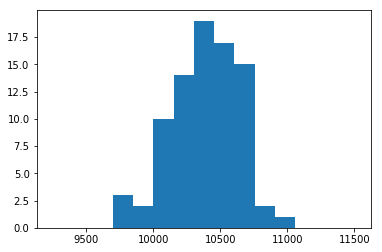

xbin, ybin = [104.4628691  126.21905758] , [-78.33333333 -55.95238095]


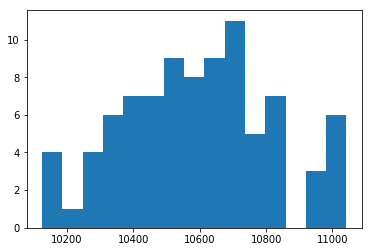

xbin, ybin = [104.4628691  126.21905758] , [-55.95238095 -33.57142857]


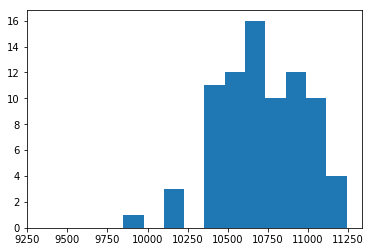

xbin, ybin = [104.4628691  126.21905758] , [-33.57142857 -11.19047619]


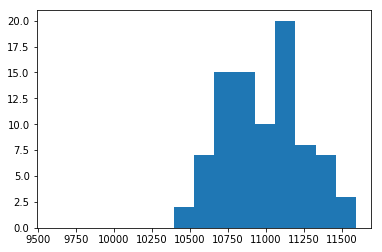

xbin, ybin = [104.4628691  126.21905758] , [-11.19047619  11.19047619]


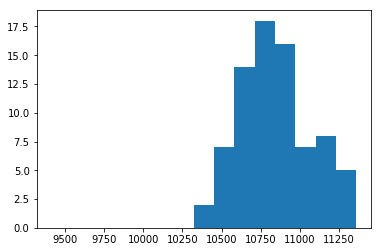

xbin, ybin = [104.4628691  126.21905758] , [11.19047619 33.57142857]


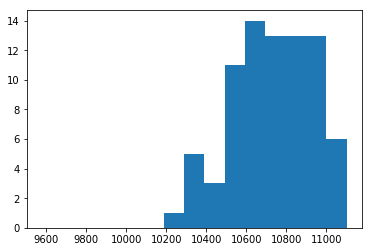

xbin, ybin = [104.4628691  126.21905758] , [33.57142857 55.95238095]


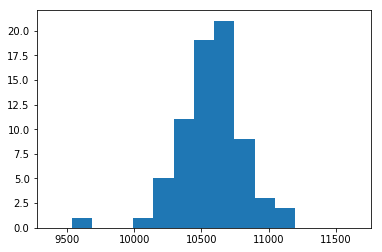

xbin, ybin = [104.4628691  126.21905758] , [55.95238095 78.33333333]


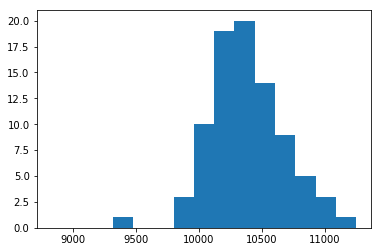

xbin, ybin = [104.4628691  126.21905758] , [ 78.33333333 100.71428571]


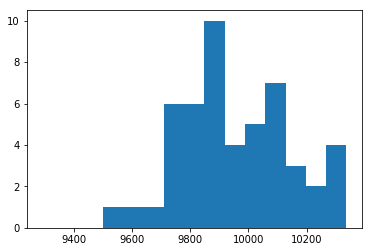

xbin, ybin = [104.4628691  126.21905758] , [100.71428571 123.0952381 ]


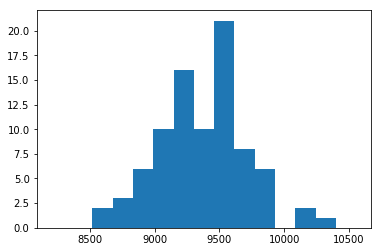

xbin, ybin = [126.21905758 147.97524607] , [-100.71428571  -78.33333333]


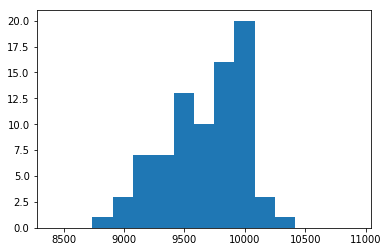

xbin, ybin = [126.21905758 147.97524607] , [-78.33333333 -55.95238095]


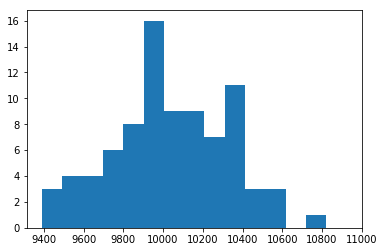

xbin, ybin = [126.21905758 147.97524607] , [-55.95238095 -33.57142857]


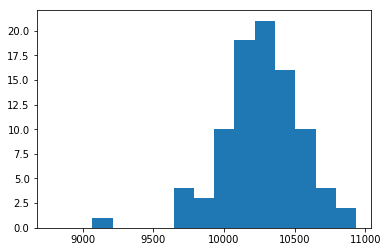

xbin, ybin = [126.21905758 147.97524607] , [-33.57142857 -11.19047619]


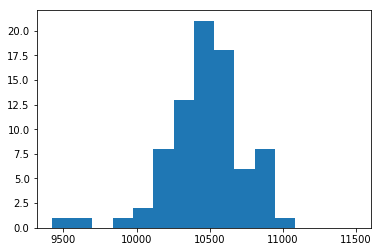

xbin, ybin = [126.21905758 147.97524607] , [-11.19047619  11.19047619]


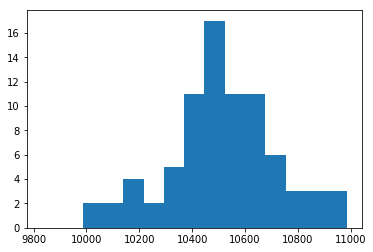

xbin, ybin = [126.21905758 147.97524607] , [11.19047619 33.57142857]


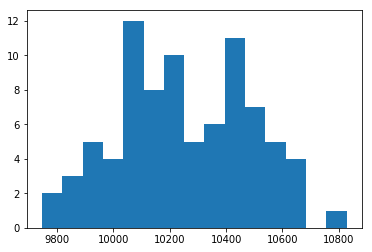

xbin, ybin = [126.21905758 147.97524607] , [33.57142857 55.95238095]


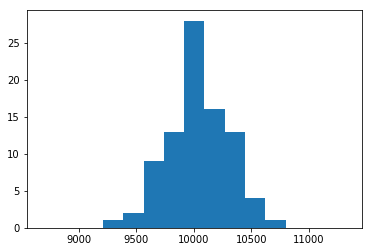

xbin, ybin = [126.21905758 147.97524607] , [55.95238095 78.33333333]


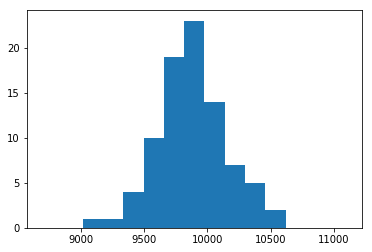

xbin, ybin = [126.21905758 147.97524607] , [ 78.33333333 100.71428571]


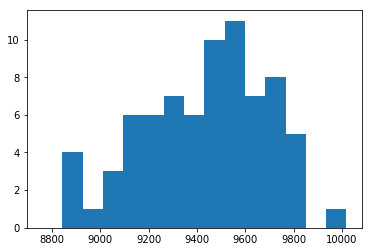

xbin, ybin = [147.97524607 169.73143455] , [-55.95238095 -33.57142857]


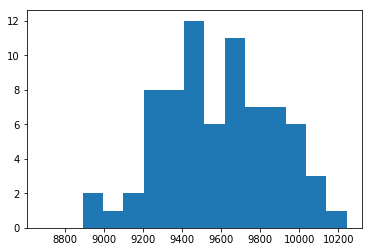

xbin, ybin = [147.97524607 169.73143455] , [-33.57142857 -11.19047619]


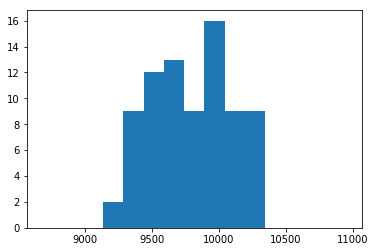

xbin, ybin = [147.97524607 169.73143455] , [-11.19047619  11.19047619]


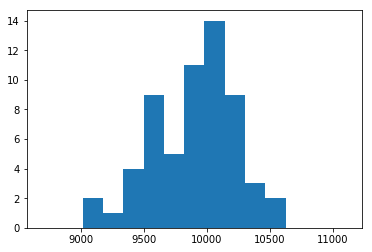

xbin, ybin = [147.97524607 169.73143455] , [11.19047619 33.57142857]


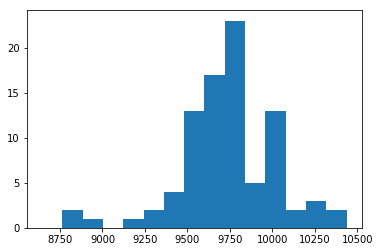

xbin, ybin = [147.97524607 169.73143455] , [33.57142857 55.95238095]


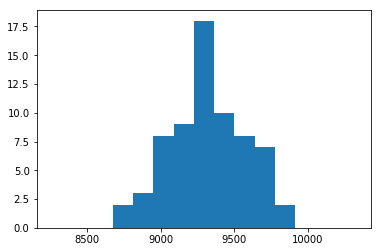

In [44]:
import itertools as it

for xbin, ybin in it.product(xbins, ybins):
    rmax = (max(np.abs(xbin))**2 + max(np.abs(ybin))**2)**0.5
    if rmax < 180:
        print('xbin, ybin =', xbin, ',', ybin)
        xycut = (x_loc > xbin[0]) & (x_loc < xbin[1]) & (y_loc > ybin[0]) & (y_loc < ybin[1])
        Esel = E[Ecut & xycut & zcut]
        mean = np.mean(Esel)
        std = np.std(Esel)
        mymax = min(mean + 2.5*std, max(Esel))
        mymin = max(mean - 2.5*std, min(Esel))
        plt.hist(Esel, bins = 15, range = (mymin, mymax))
        plt.show()

In [37]:
np.std(E[Ecut & xycut & zcut])

413.7761243726751

In [38]:
np.mean(E[Ecut & xycut & zcut])

9295.108495962286

In [111]:
import h5py
from time import time
import itertools as it
from scipy.optimize import curve_fit

zlims = [100, 200, 300, 400, 510]
rlims = [50, 100, 150, 180]

def gauss(x, A, m, s):
    if s < 0:
        return 10000000000000000
    return A*np.exp(-(x-m)**2 / (2*s**2))

def load_maps_from_file(filename, show = True):
    f = h5py.File(filename, 'r')
    e0map = np.array(f['e0']['block0_values'])
    ltmap = np.array(f['lt']['block0_values'])
    # f['mapinfo']['index'][i] tells you what is stored is stored in f['mapinfo']['values'][i]
    bounds = ((f['mapinfo']['values'][0], f['mapinfo']['values'][1]), (f['mapinfo']['values'][2], f['mapinfo']['values'][3]))
    f.close()

    if show:
        plt.imshow(e0map, extent=[bounds[0][0], bounds[0][1], bounds[1][0], bounds[1][1]], origin = 'lower')
        plt.colorbar()
        plt.title('E0')
        plt.show()

        plt.imshow(ltmap, extent=[bounds[0][0], bounds[0][1], bounds[1][0], bounds[1][1]], origin = 'lower')
        plt.colorbar()
        plt.title('LT')
        plt.clim(5000, 10000)
        plt.show()
    
    return e0map, ltmap, bounds

def get_bin_from_xy(x, y, emap, bounds):
    lowerx, lowery = bounds[0][0], bounds[1][0]
    upperx, uppery = bounds[0][1], bounds[1][1]
    nbinsx = len(emap)
    nbinsy = len(emap[0])
    dbinx = (bounds[0][1] - bounds[0][0]) / nbinsx
    dbiny = (bounds[1][1] - bounds[1][0]) / nbinsy
    ix = min(floor((x - lowerx) / dbinx), nbinsx-1)
    iy = min(floor((y - lowery) / dbiny), nbinsy-1)
    return ix, iy

def correct_energies(emap, bounds, umask, xvals, yvals, zvals, energies, ltmap = None, show = True, vocal = False):
    if vocal:
        print('Correcting energies...')
    ecorrs = []
    xymask = (xvals > bounds[0][0]) & (xvals < bounds[0][1]) & (yvals > bounds[1][0]) & (yvals < bounds[1][1])
    tcorstart = time()
    masked_xvals, masked_yvals = xvals[umask & xymask], yvals[umask & xymask]
    masked_energies = energies[umask & xymask]
    ncorevents = len(masked_xvals)
    factor_default = emap[int(len(emap)/2)][int(len(emap)/2)]
    for e in range(ncorevents):
        if vocal and e % 10000 == 0:
            print(e, '/', len(xvals[umask & xymask]))
            if e > 0:
                print('Est remaining =', round((ncorevents - e)*(time() - tcorstart) / e, 1))
        x, y = masked_xvals[e], masked_yvals[e]
        ix, iy = get_bin_from_xy(x, y, emap, bounds)
        factor = emap[ix][iy]
        if factor == 0 or np.isnan(factor):
            factor = factor_default
        if ltmap is not None:
            ixlt, iylt = get_bin_from_xy(x, y, ltmap, bounds)
            lt = ltmap[ixlt][iylt]
            z = zvals[umask & xymask][e]
            ltcorr = np.exp(z / lt)
            factor /= ltcorr
        ecorr = masked_energies[e] / factor
        ecorrs.append(ecorr)
    if show:
        plt.hist(ecorrs)
        plt.show()
    return np.array(ecorrs)

def plot_res_vs_zr(res_vs_zr):
    for rlim in rlims:
        res_vs_z = [ res_vs_zr[1000*zlim + rlim] for zlim in zlims ]
        plt.plot(zlims, res_vs_z, 'o', label = 'rlim = '+str(rlim)+' mm')
    plt.legend()
    plt.xlabel('Z upper limit (mm)')
    plt.ylabel('Resolution (%)')
    plt.show()
    print('Innermost resolution = ', round(res_vs_zr[1000*zlims[0] + rlims[0]], 2), '%')
    print('Outermost resolution = ', round(res_vs_zr[1000*zlims[-1] + rlims[-1]], 2), '%')

def fit_res_vs_xy(energies, emap, bounds, umask, xvals, yvals, zvals, show = True, zcut = 510):
    res_vs_xy = np.zeros((len(xbins),len(ybins)))
    xymask = (xvals > bounds[0][0]) & (xvals < bounds[0][1]) & (yvals > bounds[1][0]) & (yvals < bounds[1][1])
    masked_xvals, masked_yvals, masked_zvals = xvals[umask & xymask], yvals[umask & xymask], zvals[umask & xymask]
    min_nevents = 20
    
    for i, j in it.product(range(len(xbins)), range(len(ybins))):
        xbin = xbins[i]
        ybin = ybins[j]
    
        fidmask = (masked_zvals < zcut) & (masked_xvals > xbin[0]) & (masked_xvals < xbin[1]) & (masked_yvals > ybin[0]) & (masked_yvals < ybin[1]) #((masked_xvals**2 + masked_yvals**2) < rlim**2) & (masked_zvals < zlim)
        nevents = len(energies[fidmask])

        if nevents < min_nevents:
            resolution = np.nan
        else:
                        
            h = plt.hist(energies[fidmask], range=(0.85, 1.15), bins = 30)

            xdata = (h[1][:-1] + h[1][1:]) / 2
            ydata = h[0]

            (A0, m0, s0) = (np.max(ydata), 1, np.std(energies[fidmask]))

            try:
                popt, pcov = curve_fit(gauss, xdata, ydata, p0 = (A0, m0, s0))
                fitgauss = gauss(xdata, *popt)

                FWHM = 2.355 * popt[2]
                mean = popt[1]
                resolution = 100 * FWHM / mean
            except:
                resolution = np.nan
                    
        res_vs_xy[i][j] = resolution

        if (xbin == xbins[int(len(xbins)/2)]).all() and (ybin == ybins[int(len(ybins)/2)]).all() and show:
            print('Fit a Gaussian with guess (A0, m0, s0) =', (A0, m0, s0))
            plt.plot(xdata, fitgauss)
            plt.title('Xbin = '+str(xbin)+'; Ybin = '+str(ybin)+'. Resolution = '+str(round(resolution, 1))+'%')
            plt.show()
        else:
            plt.close()
    
    return res_vs_xy

def fit_res_vs_zr(energies, emap, bounds, umask, xvals, yvals, zvals, show = True):
    res_vs_zr = {}
    xymask = (xvals > bounds[0][0]) & (xvals < bounds[0][1]) & (yvals > bounds[1][0]) & (yvals < bounds[1][1])
    masked_xvals, masked_yvals, masked_zvals = xvals[umask & xymask], yvals[umask & xymask], zvals[umask & xymask]

    for zlim, rlim in it.product(zlims, rlims):
    
        fidmask = ((masked_xvals**2 + masked_yvals**2) < rlim**2) & (masked_zvals < zlim)
        h = plt.hist(energies[fidmask], range=(0.85, 1.15), bins = 30)

        xdata = (h[1][:-1] + h[1][1:]) / 2
        ydata = h[0]

        (A0, m0, s0) = (np.max(ydata), 1, np.std(energies[fidmask]))
        
        popt, pcov = curve_fit(gauss, xdata, ydata, p0 = (A0, m0, s0))
        fitgauss = gauss(xdata, *popt)

        FWHM = 2.355 * popt[2]
        mean = popt[1]
        resolution = 100 * FWHM / mean

        res_vs_zr[zlim*1000+rlim] = resolution

        if zlim == zlims[0] and rlim == rlims[0] and show:
            print('Fit a Gaussian with guess (A0, m0, s0) =', (A0, m0, s0))
            plt.plot(xdata, fitgauss)
            plt.title('Z < '+str(zlim)+'; R < '+str(rlim)+'. Resolution = '+str(round(resolution, 1))+'%')
            plt.show()
        else:
            plt.close()
    
    return res_vs_zr

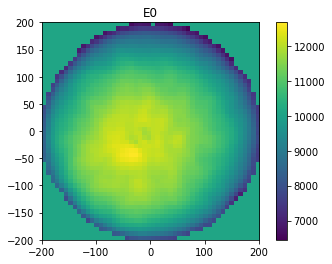

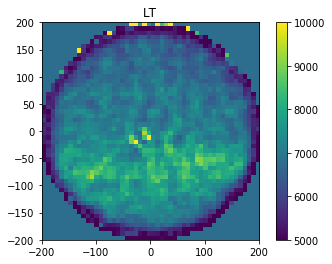

In [118]:
file_7472   = '/Volumes/NEXT_Data/IC_Data/st190819/maps/kr_emap_xy_50_50_r_7472_st190819.h5'

nomask = np.ones(len(E), dtype='bool')

# def correct_energies(emap, bounds, umask, xvals, yvals, zvals, energies, ltmap = None, show = True, vocal = False):

e0_7472, lt_7472, bounds_7472 = load_maps_from_file(file_7472)

## Check resolution variation for local iterated

In [121]:
def examine_xy(myX, myY, xytype):

    print('======================================')
    print('======================================')
    print('======== WORKING ON', xytype, '=======')
    print('======================================')
    print('======================================')
    
    print('Correcting energies using 7472')
    r7472_scaled_energy_json = correct_energies(e0_7472, bounds_7472, Ecut, myX, myY, Zgauss, E, ltmap = lt_7472, vocal = True)
    r7472_res_vs_zr_json = fit_res_vs_zr(r7472_scaled_energy_json, e0_7472, bounds_7472, Ecut, myX, myY, Zgauss, show = True)
    plot_res_vs_zr(r7472_res_vs_zr_json)

    res_v_xy_v_z = {}
    print('Innermost resolutions, 7472 corrected')
    for zlim in zlims:
        print('ZLIM =', zlim)
        r7472_res_vs_xy_json = fit_res_vs_xy(r7472_scaled_energy_json, e0_7472, bounds_7472, Ecut, myX, myY, Zgauss, show = True, zcut = zlim)
        res_v_xy_v_z[zlim] = r7472_res_vs_xy_json

    binrs = np.array([np.array([(np.mean(xbin)**2 + np.mean(ybin)**2)**0.5 for xbin in xbins]) for ybin in ybins])
    xbincs = [ np.mean(xbin) for xbin in xbins ]
    ybincs = [ np.mean(ybin) for ybin in ybins ]

    print('Resolution maps and slices, 7472 corrected')
    for zlim in res_v_xy_v_z.keys():
        imid = int(len(binrs) / 2)

        r7472_res_vs_xy_json = res_v_xy_v_z[zlim]
        yslice = r7472_res_vs_xy_json[imid]
        xslice = [ r7472_res_vs_xy_json[i][imid] for i in range(len(r7472_res_vs_xy_json)) ]

        plt.plot(xbincs, xslice, 'o')
        plt.title('Resolution in y = 0 slice')
        plt.ylabel('Resolution (%)')
        plt.xlabel('X (mm)')
        plt.show()

        plt.plot(ybincs, yslice, 'o')
        plt.title('Resolution in x = 0 slice')
        plt.ylabel('Resolution (%)')
        plt.xlabel('Y (mm)')
        plt.show()

        plt.imshow(r7472_res_vs_xy_json, extent=[bounds_7472[0][0], bounds_7472[0][1], bounds_7472[1][0], bounds_7472[1][1]], origin = 'lower')
        plt.colorbar()
        plt.clim(2, 7)
        plt.title('Resolution, Z < '+str(zlim))
        plt.show()

    print('Creating self correction map')

    # Create own correction map
    nbins = len(xbins)
    clim = 200
    dbin = 2 * clim / nbins
    coord_range = np.linspace(-clim, clim, nbins + 1)
    coord_bins = np.vstack((coord_range[:-1], coord_range[1:])).T

    energy_sum = np.zeros((len(coord_bins),len(coord_bins)))
    events_sum = np.zeros((len(coord_bins),len(coord_bins)))
    for ix in range(len(coord_bins)):
        for iy in range(len(coord_bins)):
            xbin = coord_bins[ix]
            ybin = coord_bins[iy]
            xmask = (myX > xbin[0]) & (myX <= xbin[1])
            ymask = (myY > ybin[0]) & (myY <= ybin[1])
            xymask = xmask & ymask
            events_sum[ix][iy] = np.sum(xymask & Ecut)
            energy_sum[ix][iy] = np.sum(E[xymask & Ecut])

    energy_xy = energy_sum / events_sum
    energy_xy_bounds = ((-200, 200), (-200, 200))

    plt.imshow(energy_xy, extent=[-200, 200, -200, 200], origin = 'lower')
    plt.colorbar()
    plt.show()

    print('Applying self correction.')

    self_scaled_energy_json = correct_energies(energy_xy, energy_xy_bounds, Ecut, myX, myY, Zgauss, E, ltmap = lt_7472, vocal = True)

    res_v_xy_v_z_self = {}
    print('Self corrected resolution in innermost bins')
    for zlim in zlims:
        print('ZLIM =', zlim)
        self_res_vs_xy_json = fit_res_vs_xy(self_scaled_energy_json, energy_xy, energy_xy_bounds, Ecut, myX, myY, Zgauss, show = True, zcut = zlim)
        res_v_xy_v_z_self[zlim] = self_res_vs_xy_json

======== WORKING ON Local iterated =======
Correcting energies using 7472
Correcting energies...
0 / 116223
10000 / 116223
Est remaining = 363.9
20000 / 116223
Est remaining = 345.9
30000 / 116223
Est remaining = 339.6
40000 / 116223
Est remaining = 294.0
50000 / 116223
Est remaining = 248.2
60000 / 116223
Est remaining = 206.5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/__main__.py:72: RuntimeWarning: divide by zero encountered in double_scalars


70000 / 116223
Est remaining = 167.4
80000 / 116223
Est remaining = 129.7
90000 / 116223
Est remaining = 93.1
100000 / 116223
Est remaining = 57.2
110000 / 116223
Est remaining = 22.1


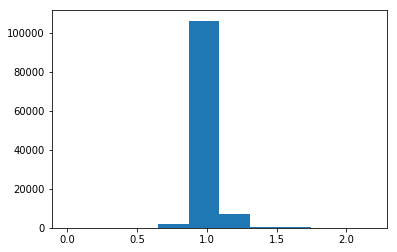

Fit a Gaussian with guess (A0, m0, s0) = (302.0, 1, 0.08671486322435287)


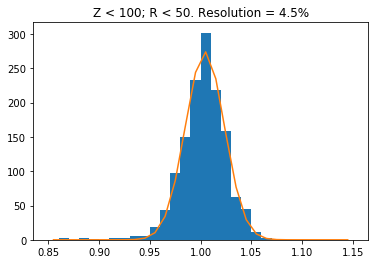

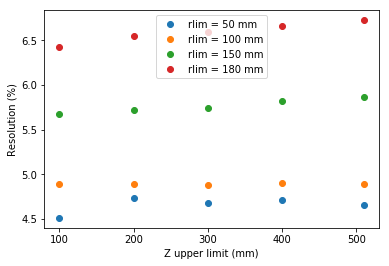

Innermost resolution =  4.51 %
Outermost resolution =  6.72 %
Innermost resolutions, 7472 corrected
ZLIM = 100
Fit a Gaussian with guess (A0, m0, s0) = (18.0, 1, 0.22286047381289187)


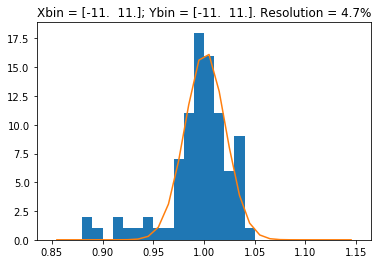

ZLIM = 200
Fit a Gaussian with guess (A0, m0, s0) = (33.0, 1, 0.1782108845452934)


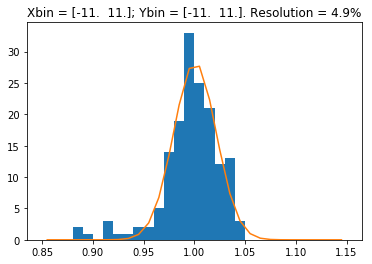

ZLIM = 300
Fit a Gaussian with guess (A0, m0, s0) = (42.0, 1, 0.1523838779606089)


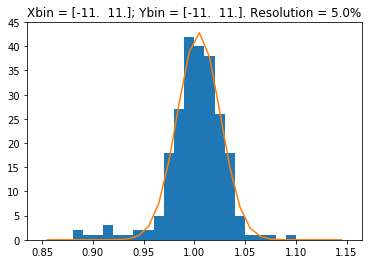

ZLIM = 400
Fit a Gaussian with guess (A0, m0, s0) = (61.0, 1, 0.1381633562656504)


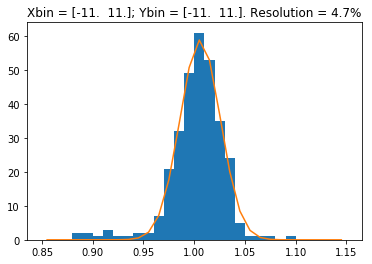

ZLIM = 510
Fit a Gaussian with guess (A0, m0, s0) = (78.0, 1, 0.12453679291083758)


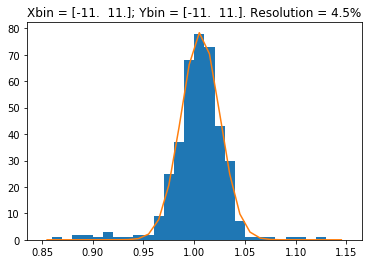

Resolution maps and slices, 7472 corrected


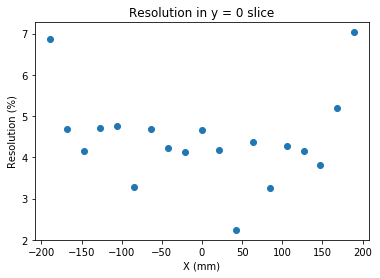

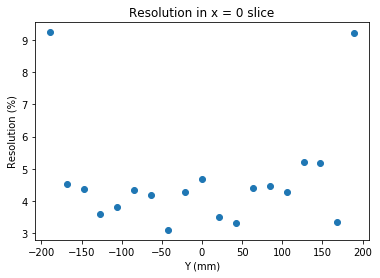

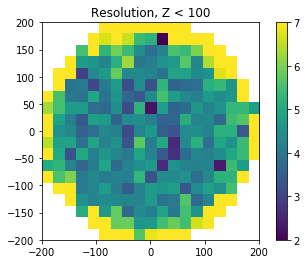

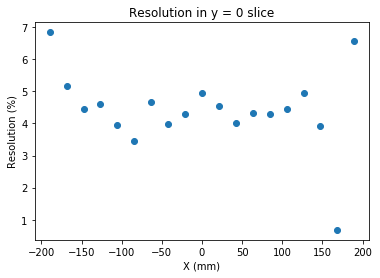

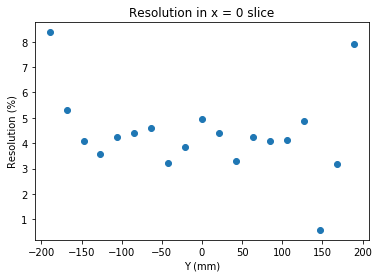

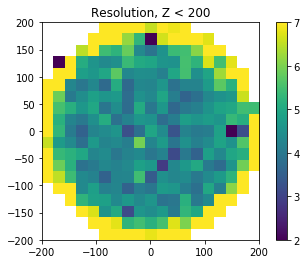

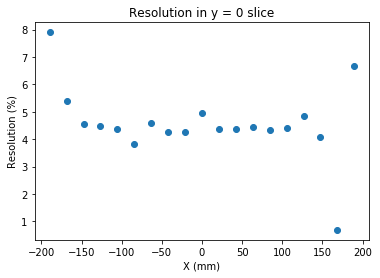

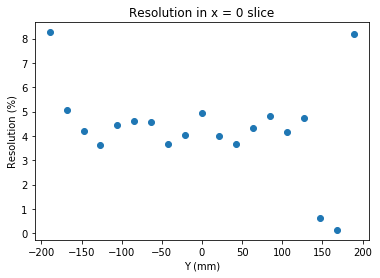

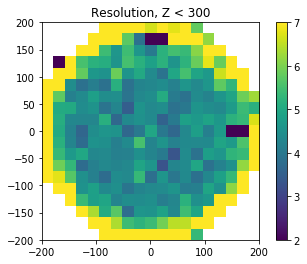

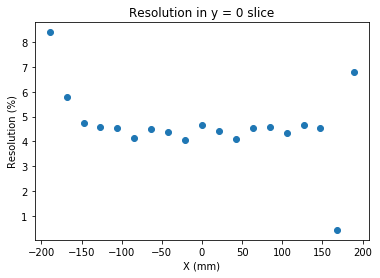

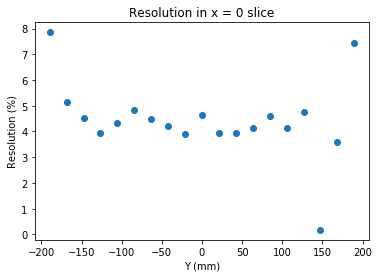

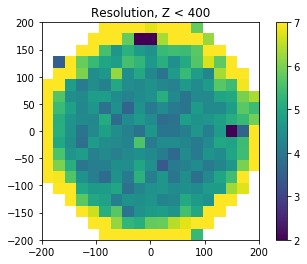

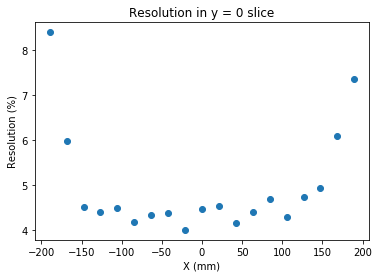

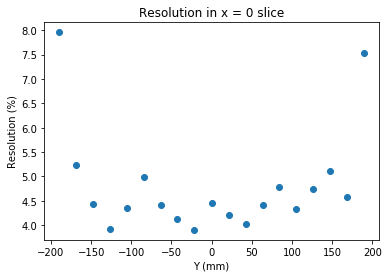

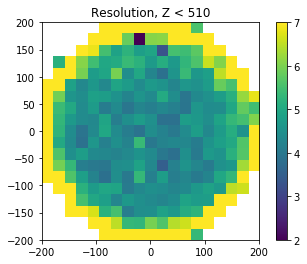

Creating self correction map


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/__main__.py:72: RuntimeWarning: invalid value encountered in true_divide


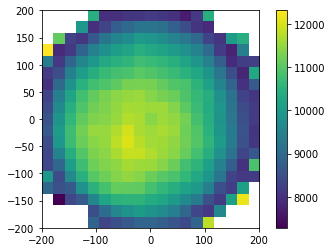

Applying self correction.
Correcting energies...
0 / 116223
10000 / 116223
Est remaining = 397.5
20000 / 116223
Est remaining = 353.7
30000 / 116223
Est remaining = 314.4
40000 / 116223
Est remaining = 279.5
50000 / 116223
Est remaining = 244.7
60000 / 116223
Est remaining = 225.5
70000 / 116223
Est remaining = 182.4
80000 / 116223
Est remaining = 140.9
90000 / 116223
Est remaining = 101.7
100000 / 116223
Est remaining = 62.9
110000 / 116223
Est remaining = 24.0


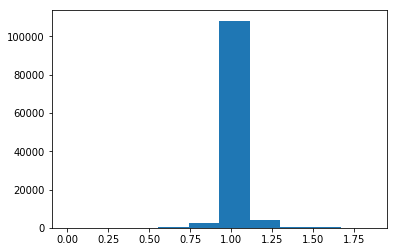

Self corrected resolution in innermost bins
ZLIM = 100
Fit a Gaussian with guess (A0, m0, s0) = (17.0, 1, 0.2340511487465032)


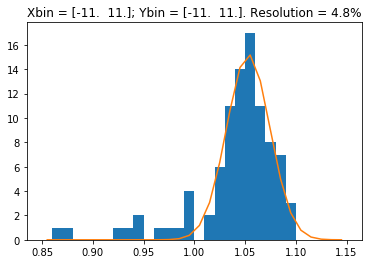

ZLIM = 200
Fit a Gaussian with guess (A0, m0, s0) = (32.0, 1, 0.1867939779897779)


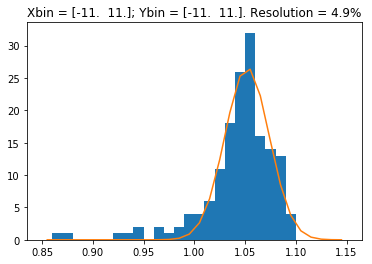

ZLIM = 300
Fit a Gaussian with guess (A0, m0, s0) = (45.0, 1, 0.15964494112248628)


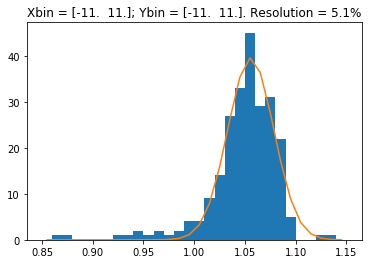

ZLIM = 400
Fit a Gaussian with guess (A0, m0, s0) = (60.0, 1, 0.1447816969975615)


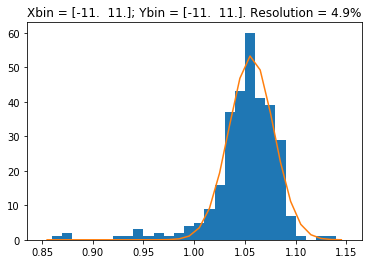

ZLIM = 510
Fit a Gaussian with guess (A0, m0, s0) = (72.0, 1, 0.13059822861025017)


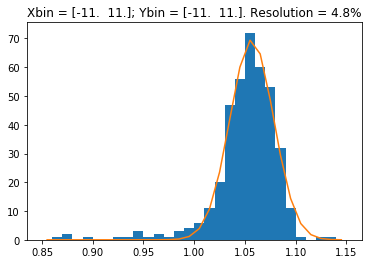

In [122]:
examine_xy(x_locit, y_locit, 'Local iterated')

======== WORKING ON Local =======
Correcting energies using 7472
Correcting energies...
0 / 116238
10000 / 116238
Est remaining = 421.2
20000 / 116238
Est remaining = 355.0
30000 / 116238
Est remaining = 307.9
40000 / 116238
Est remaining = 268.3
50000 / 116238
Est remaining = 237.1
60000 / 116238
Est remaining = 200.8


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/__main__.py:72: RuntimeWarning: divide by zero encountered in double_scalars


70000 / 116238
Est remaining = 163.8
80000 / 116238
Est remaining = 131.7
90000 / 116238
Est remaining = 97.9
100000 / 116238
Est remaining = 61.3
110000 / 116238
Est remaining = 24.0


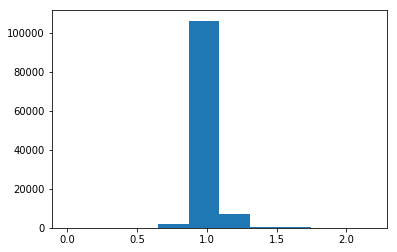

Fit a Gaussian with guess (A0, m0, s0) = (308.0, 1, 0.08665241750081998)


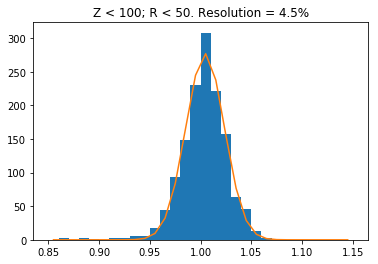

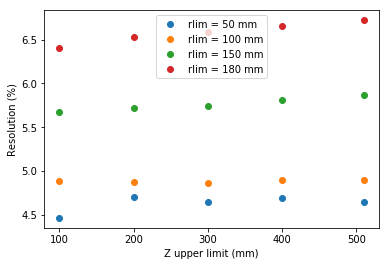

Innermost resolution =  4.46 %
Outermost resolution =  6.72 %
Innermost resolutions, 7472 corrected
ZLIM = 100
Fit a Gaussian with guess (A0, m0, s0) = (18.0, 1, 0.22586384494989292)


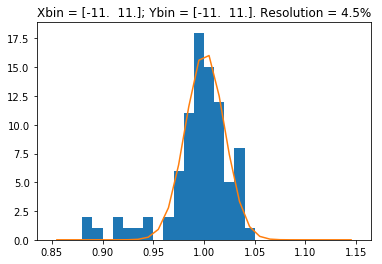

ZLIM = 200
Fit a Gaussian with guess (A0, m0, s0) = (32.0, 1, 0.18106619167009055)


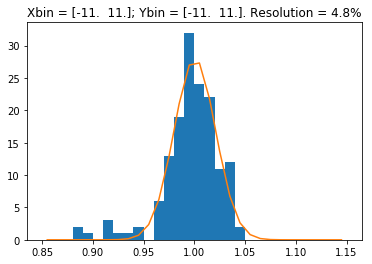

ZLIM = 300
Fit a Gaussian with guess (A0, m0, s0) = (41.0, 1, 0.15567202557066437)


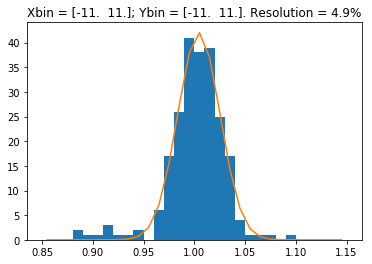

ZLIM = 400
Fit a Gaussian with guess (A0, m0, s0) = (60.0, 1, 0.14089981288855138)


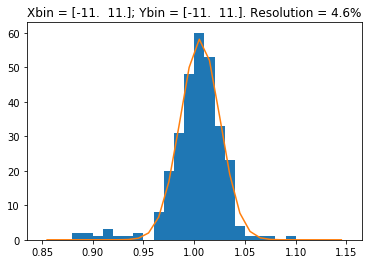

ZLIM = 510
Fit a Gaussian with guess (A0, m0, s0) = (77.0, 1, 0.1266225518835661)


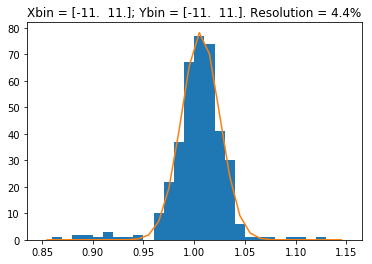

Resolution maps and slices, 7472 corrected


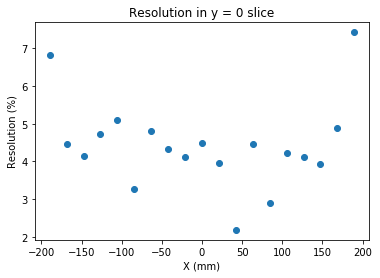

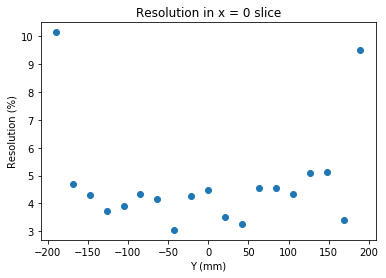

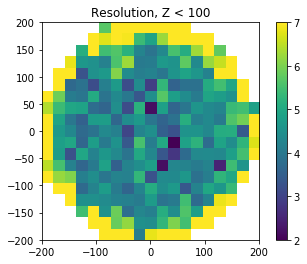

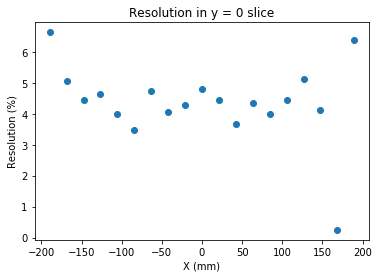

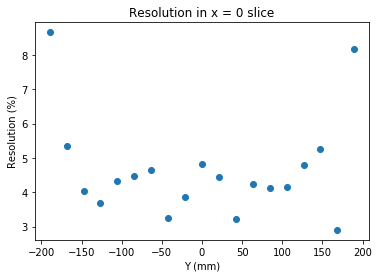

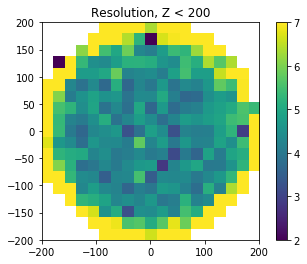

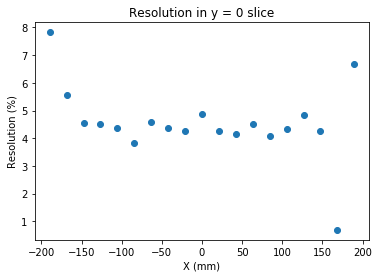

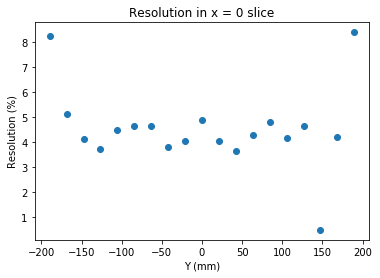

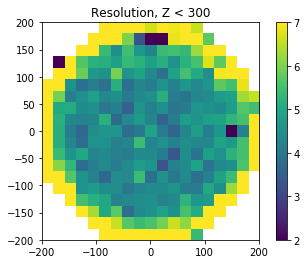

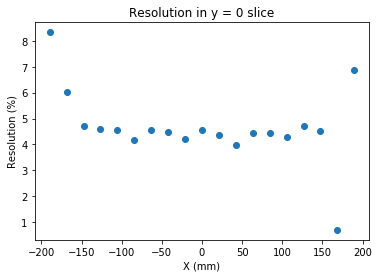

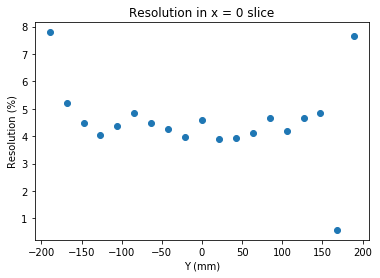

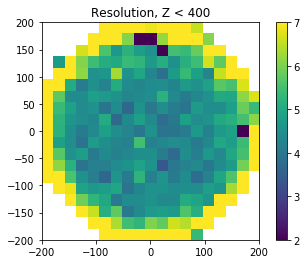

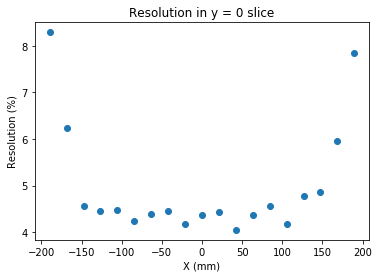

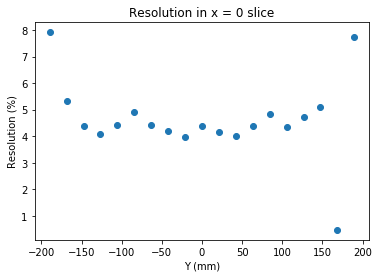

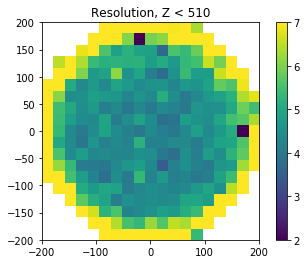

Creating self correction map


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/__main__.py:72: RuntimeWarning: invalid value encountered in true_divide


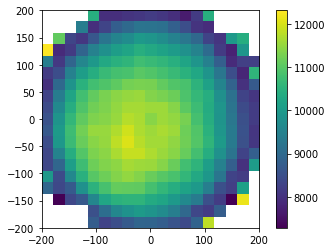

Applying self correction.
Correcting energies...
0 / 116238
10000 / 116238
Est remaining = 405.1
20000 / 116238
Est remaining = 388.0
30000 / 116238
Est remaining = 372.6
40000 / 116238
Est remaining = 335.7
50000 / 116238
Est remaining = 289.0
60000 / 116238
Est remaining = 243.8
70000 / 116238
Est remaining = 195.9
80000 / 116238
Est remaining = 150.9
90000 / 116238
Est remaining = 107.7
100000 / 116238
Est remaining = 66.0
110000 / 116238
Est remaining = 25.1


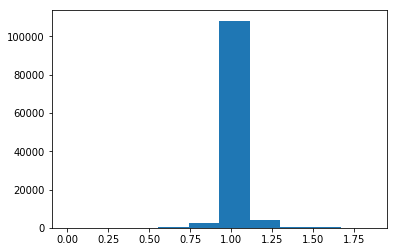

Self corrected resolution in innermost bins
ZLIM = 100
Fit a Gaussian with guess (A0, m0, s0) = (22.0, 1, 0.23753833990514858)


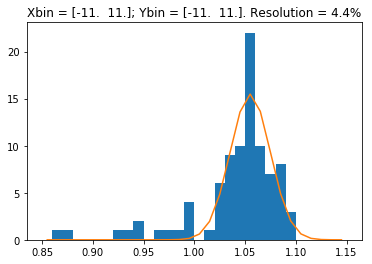

ZLIM = 200
Fit a Gaussian with guess (A0, m0, s0) = (36.0, 1, 0.1899556363719469)


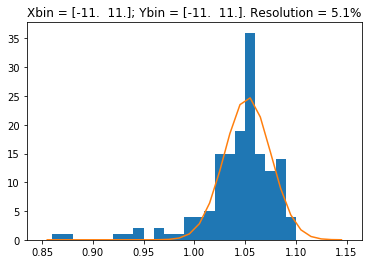

ZLIM = 300
Fit a Gaussian with guess (A0, m0, s0) = (47.0, 1, 0.1634747438149701)


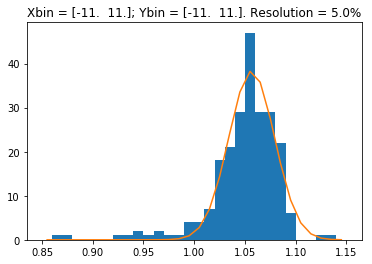

ZLIM = 400
Fit a Gaussian with guess (A0, m0, s0) = (61.0, 1, 0.14803388695093914)


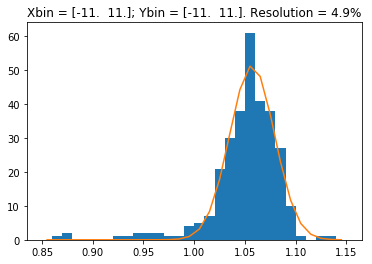

ZLIM = 510
Fit a Gaussian with guess (A0, m0, s0) = (72.0, 1, 0.13304182541618872)


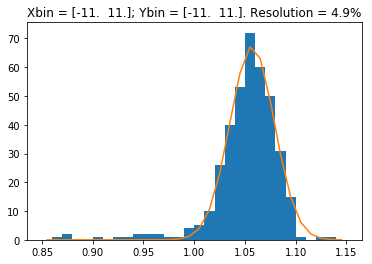

In [125]:
examine_xy(x_loc, y_loc, 'Local')

======== WORKING ON Global =======
Correcting energies using 7472
Correcting energies...
0 / 116506
10000 / 116506
Est remaining = 351.7
20000 / 116506
Est remaining = 316.6
30000 / 116506
Est remaining = 284.1
40000 / 116506
Est remaining = 252.7
50000 / 116506
Est remaining = 219.6
60000 / 116506
Est remaining = 186.8


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/__main__.py:72: RuntimeWarning: divide by zero encountered in double_scalars


70000 / 116506
Est remaining = 153.3
80000 / 116506
Est remaining = 120.2
90000 / 116506
Est remaining = 87.3
100000 / 116506
Est remaining = 54.3
110000 / 116506
Est remaining = 21.4


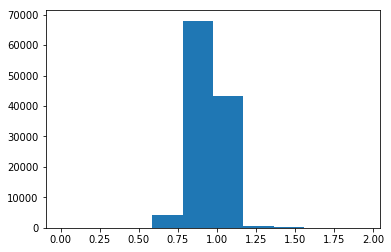

Fit a Gaussian with guess (A0, m0, s0) = (401.0, 1, 0.12006227125912454)


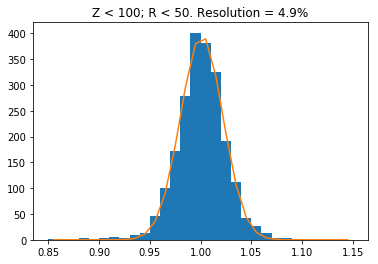

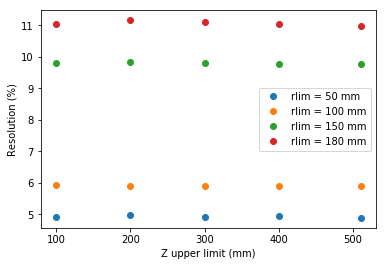

Innermost resolution =  4.92 %
Outermost resolution =  10.99 %
Innermost resolutions, 7472 corrected
ZLIM = 100
Fit a Gaussian with guess (A0, m0, s0) = (30.0, 1, 0.2265466771456169)


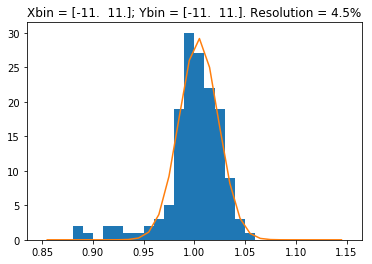

ZLIM = 200


/Users/jmhaefner/Library/Python/3.7/lib/python/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Fit a Gaussian with guess (A0, m0, s0) = (56.0, 1, 0.18088871906180992)


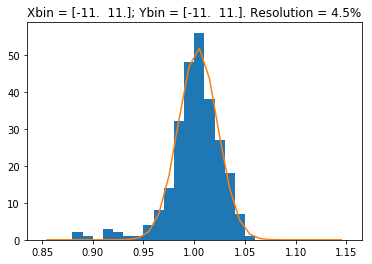

ZLIM = 300
Fit a Gaussian with guess (A0, m0, s0) = (79.0, 1, 0.15782264231861018)


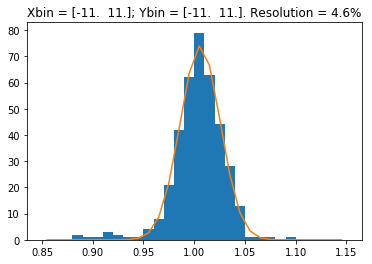

ZLIM = 400
Fit a Gaussian with guess (A0, m0, s0) = (112.0, 1, 0.14242442014118964)


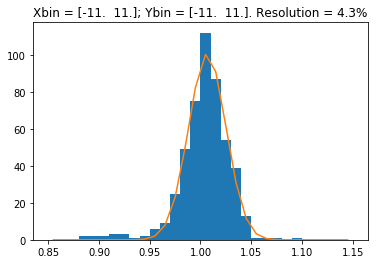

/Users/jmhaefner/Library/Python/3.7/lib/python/site-packages/scipy/optimize/minpack.py:787: RuntimeWarning: overflow encountered in multiply
  pcov = pcov * s_sq


ZLIM = 510
Fit a Gaussian with guess (A0, m0, s0) = (138.0, 1, 0.128592884195146)


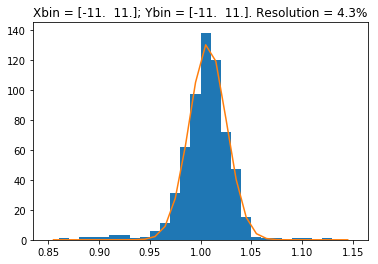

Resolution maps and slices, 7472 corrected


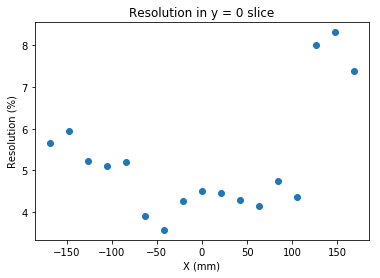

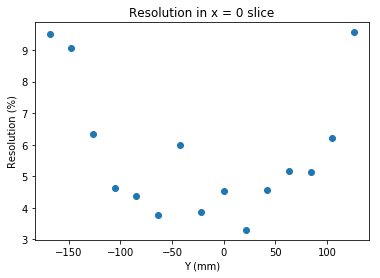

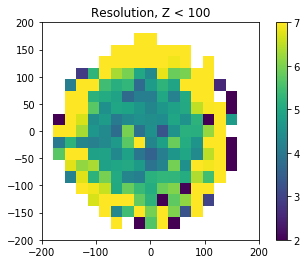

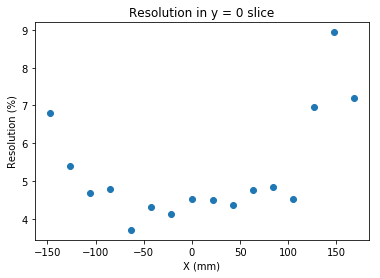

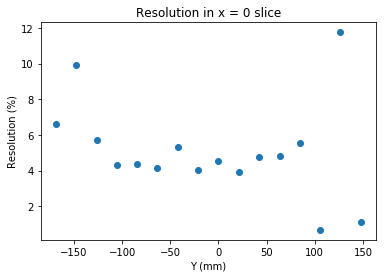

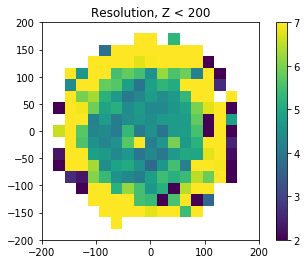

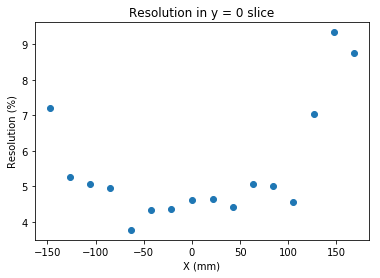

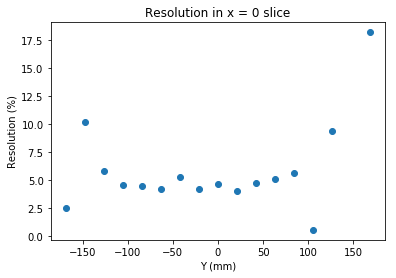

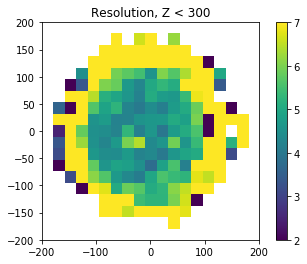

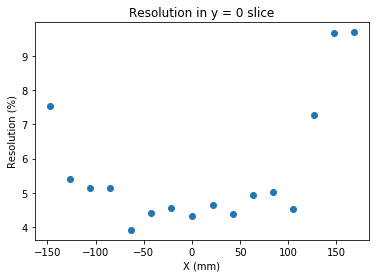

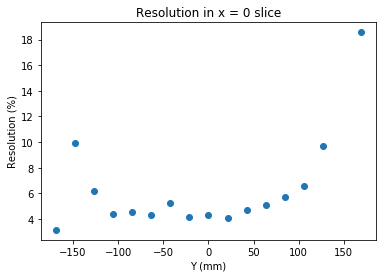

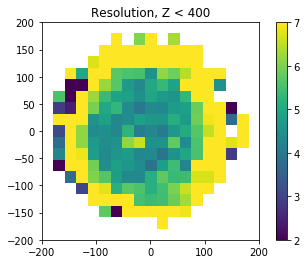

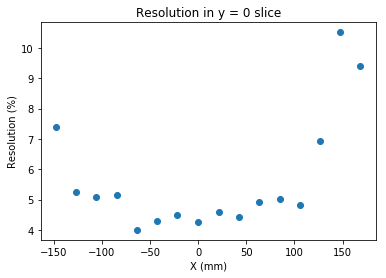

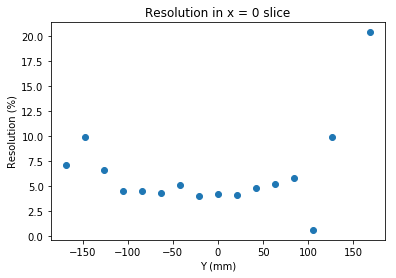

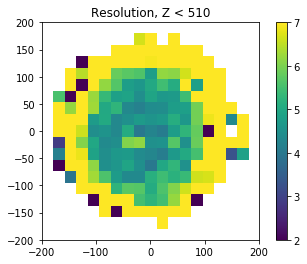

Creating self correction map


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/__main__.py:72: RuntimeWarning: invalid value encountered in true_divide


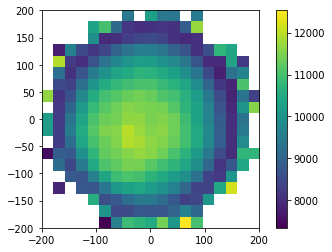

Applying self correction.
Correcting energies...
0 / 116506
10000 / 116506
Est remaining = 353.6
20000 / 116506
Est remaining = 319.8
30000 / 116506
Est remaining = 285.7
40000 / 116506
Est remaining = 253.2
50000 / 116506
Est remaining = 220.2
60000 / 116506
Est remaining = 187.0
70000 / 116506
Est remaining = 154.1
80000 / 116506
Est remaining = 121.0
90000 / 116506
Est remaining = 87.8
100000 / 116506
Est remaining = 54.6
110000 / 116506
Est remaining = 21.6


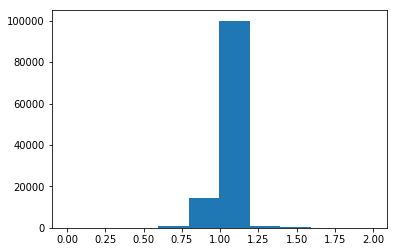

Self corrected resolution in innermost bins
ZLIM = 100
Fit a Gaussian with guess (A0, m0, s0) = (33.0, 1, 0.23695422118532386)


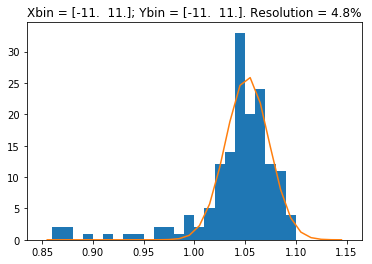

ZLIM = 200
Fit a Gaussian with guess (A0, m0, s0) = (49.0, 1, 0.18906803597719296)


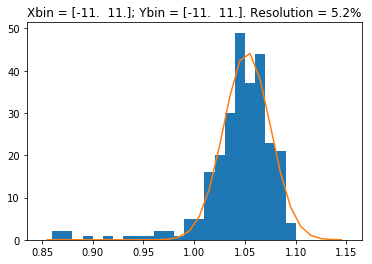

ZLIM = 300
Fit a Gaussian with guess (A0, m0, s0) = (66.0, 1, 0.16487108065504819)


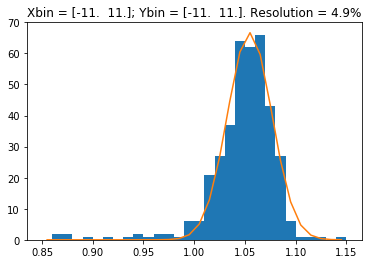

ZLIM = 400
Fit a Gaussian with guess (A0, m0, s0) = (88.0, 1, 0.1487557353374006)


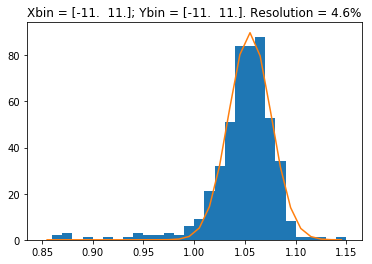

ZLIM = 510
Fit a Gaussian with guess (A0, m0, s0) = (115.0, 1, 0.13438109461539835)


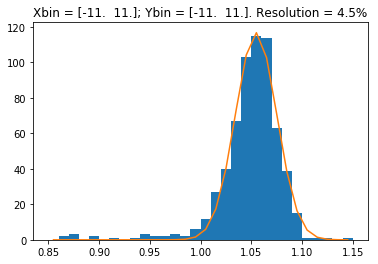

In [124]:
examine_xy(x_glob, y_glob, 'Global')

======== WORKING ON Max SiPM =======
Correcting energies using 7472
Correcting energies...
0 / 116204
10000 / 116204
Est remaining = 382.5
20000 / 116204
Est remaining = 346.5
30000 / 116204
Est remaining = 311.5
40000 / 116204
Est remaining = 275.1
50000 / 116204
Est remaining = 238.7
60000 / 116204
Est remaining = 204.4


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/__main__.py:72: RuntimeWarning: divide by zero encountered in double_scalars


70000 / 116204
Est remaining = 172.4
80000 / 116204
Est remaining = 134.5
90000 / 116204
Est remaining = 97.2
100000 / 116204
Est remaining = 59.9
110000 / 116204
Est remaining = 22.9


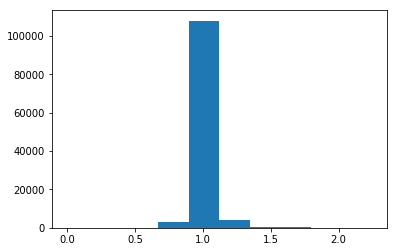

Fit a Gaussian with guess (A0, m0, s0) = (290.0, 1, 0.06110821850165343)


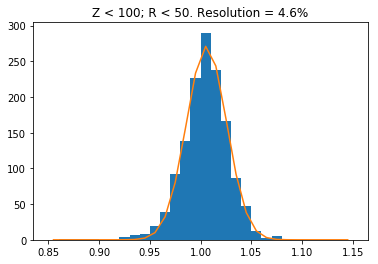

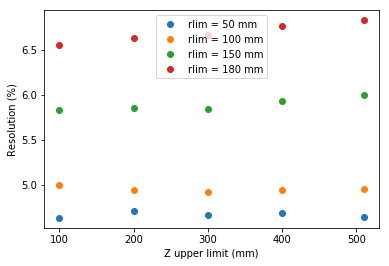

Innermost resolution =  4.63 %
Outermost resolution =  6.83 %
Innermost resolutions, 7472 corrected
ZLIM = 100
Fit a Gaussian with guess (A0, m0, s0) = (16.0, 1, 0.031724150598907305)


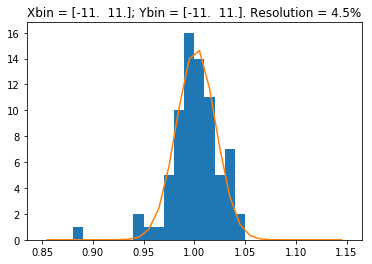

ZLIM = 200
Fit a Gaussian with guess (A0, m0, s0) = (26.0, 1, 0.027852781302383958)


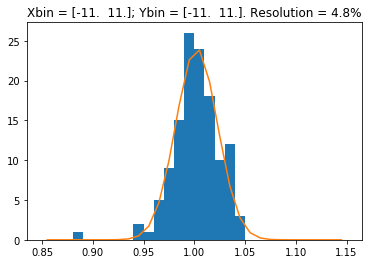

/Users/jmhaefner/Library/Python/3.7/lib/python/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


ZLIM = 300
Fit a Gaussian with guess (A0, m0, s0) = (35.0, 1, 0.03647627905602809)


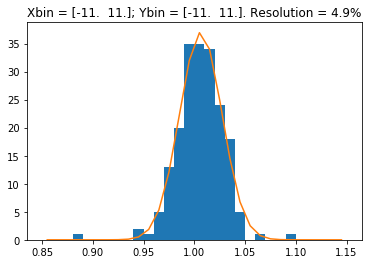

ZLIM = 400
Fit a Gaussian with guess (A0, m0, s0) = (52.0, 1, 0.037562848181098014)


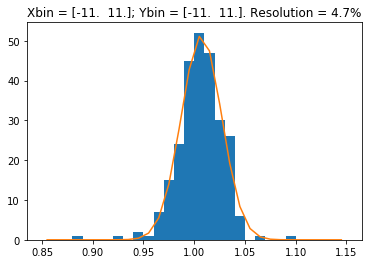

ZLIM = 510
Fit a Gaussian with guess (A0, m0, s0) = (71.0, 1, 0.03475226858212091)


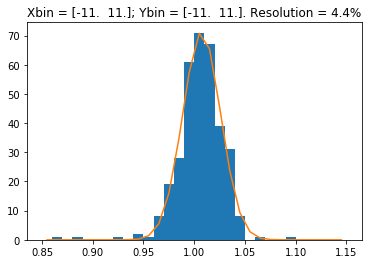

Resolution maps and slices, 7472 corrected


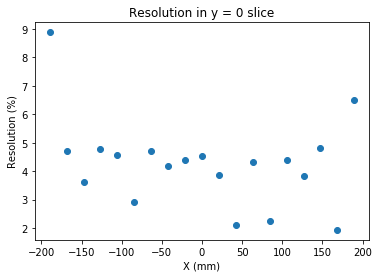

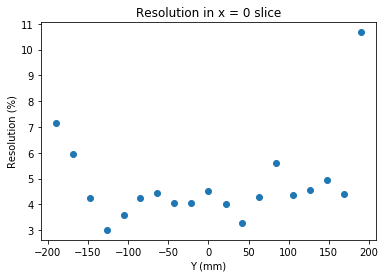

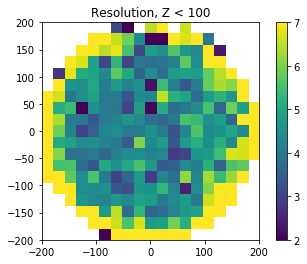

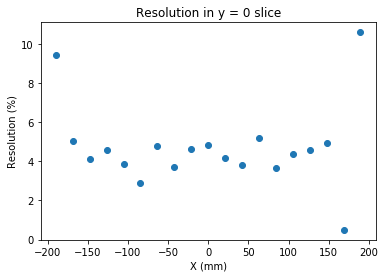

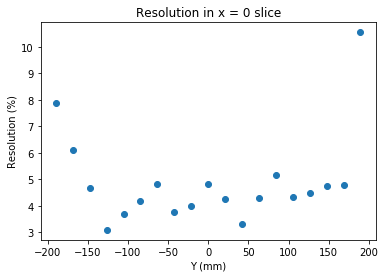

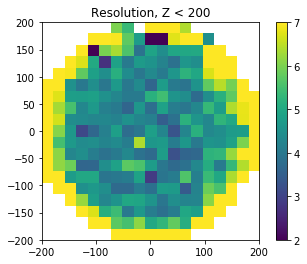

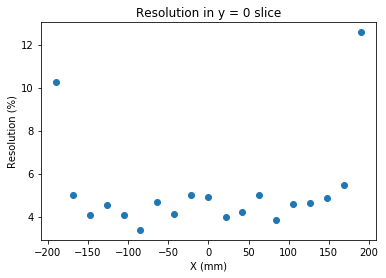

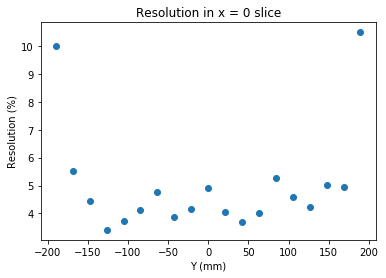

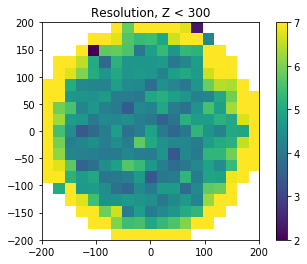

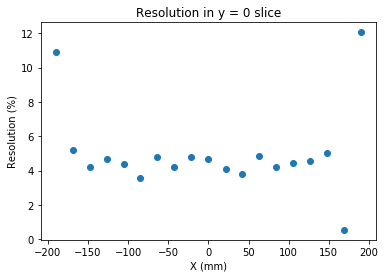

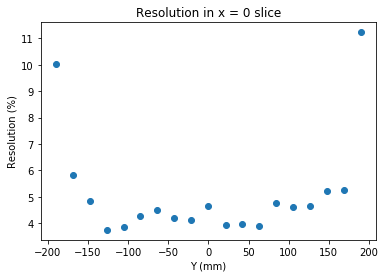

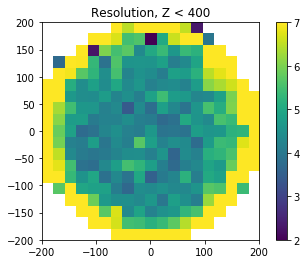

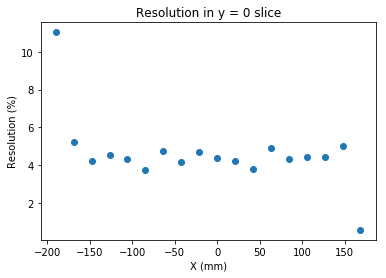

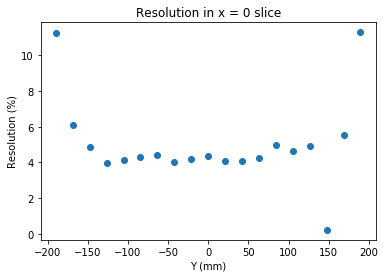

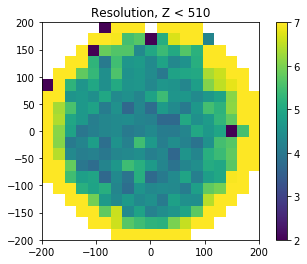

Creating self correction map


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/__main__.py:72: RuntimeWarning: invalid value encountered in true_divide


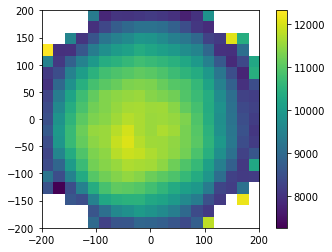

Applying self correction.
Correcting energies...
0 / 116204
10000 / 116204
Est remaining = 379.6
20000 / 116204
Est remaining = 343.9
30000 / 116204
Est remaining = 309.2
40000 / 116204
Est remaining = 274.1
50000 / 116204
Est remaining = 238.2
60000 / 116204
Est remaining = 203.1
70000 / 116204
Est remaining = 167.4
80000 / 116204
Est remaining = 131.1
90000 / 116204
Est remaining = 95.0
100000 / 116204
Est remaining = 58.8
110000 / 116204
Est remaining = 22.5


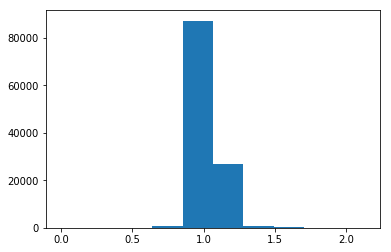

Self corrected resolution in innermost bins
ZLIM = 100
Fit a Gaussian with guess (A0, m0, s0) = (14.0, 1, 0.03346258558443374)


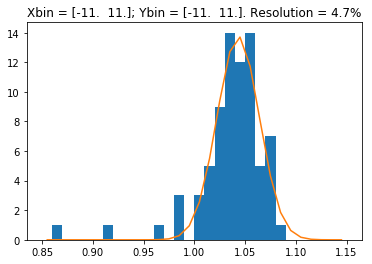

ZLIM = 200
Fit a Gaussian with guess (A0, m0, s0) = (26.0, 1, 0.029469522550176985)


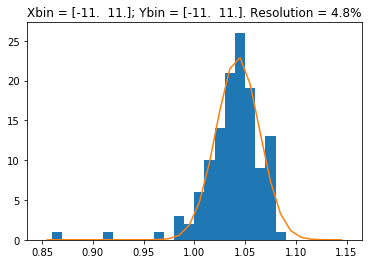

ZLIM = 300
Fit a Gaussian with guess (A0, m0, s0) = (38.0, 1, 0.03875306566678254)


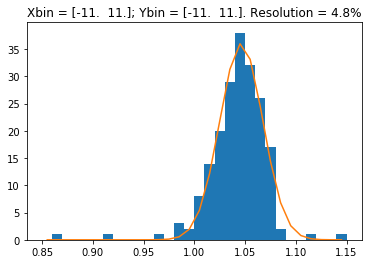

ZLIM = 400
Fit a Gaussian with guess (A0, m0, s0) = (54.0, 1, 0.03988357007785425)


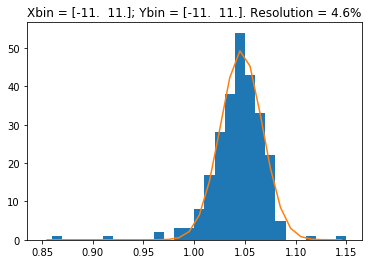

ZLIM = 510
Fit a Gaussian with guess (A0, m0, s0) = (69.0, 1, 0.036796554005307486)


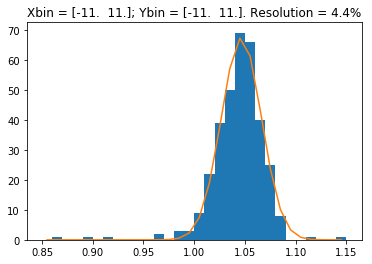

In [126]:
examine_xy(x_msipm, y_msipm, 'Max SiPM')

## Examine position sensitivity vs location

In [165]:
# x_msipm = np.array(histat_data['events_X_sipm_subtracted'])
# x_glob = np.array(histat_data['events_global_X'])
# x_loc = np.array(histat_data['events_local_X'])
# x_locit = np.array(histat_data['events_localit_X'])
dx_loc_m = x_loc - x_msipm # dx _ local _ max sipm
dy_loc_m = y_loc - y_msipm
dx_loc_locit = x_loc - x_locit # dx _ local _ max sipm
dy_loc_locit = y_loc - y_locit

In [159]:
def arr_v_xy(arr, xvals, yvals):
    arr_vs_xy = np.zeros((len(xbins), len(ybins)))
    
    for i, j in it.product(range(len(xbins)), range(len(ybins))):
        xbin = xbins[i]
        ybin = ybins[j]
        fidmask = (xvals > xbin[0]) & (xvals < xbin[1]) & (yvals > ybin[0]) & (yvals < ybin[1])
        
        arr_fid = arr[fidmask]
        arr_vs_xy[i][j] = np.median(arr_fid)
        if abs(np.mean(arr_fid)) > 10:
            print('For bin', xbin, ',', ybin,', we get the following list of differences:')
            print(arr_fid)
            print('The avg difference is', np.mean(arr_fid))
            print('The median difference is', np.median(arr_fid))
            print('Len =', len(arr_fid))
            print()
            plt.hist(arr_fid)
            plt.show()
        
    return arr_vs_xy

/Users/jmhaefner/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jmhaefner/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


For bin [-11.  11.] , [-11.  11.] , we get the following list of differences:
[-2.99369996e+00  2.35000000e+02 -1.06699697e+00  2.04237761e+00
 -5.11966737e+00  1.37983545e+00  3.18878490e+00 -4.94839425e+00
  5.45804377e-01  2.97040274e+00  2.35000000e+02  1.17669993e+00
 -2.27717292e+00 -1.36143448e+00 -4.59522050e+00 -7.34643616e-01
  1.51755057e+00  3.74382597e+00  2.89295545e+00  3.89918883e+00
  2.04429587e+00 -1.28896461e+00  1.65861382e+00 -8.63511326e-01
  1.54875279e+00 -5.28980666e-01 -5.91417928e+00  3.36049638e+00
 -9.84530064e-01  2.35000000e+02  1.15713465e+00  1.14822771e+00
  8.97557333e-01 -1.17034213e+00 -4.32633776e+00  4.51605159e+00
  4.33608582e+00  1.35154102e+00 -5.41590102e+00 -2.42560264e+00
  4.02654217e+00  7.15228474e-01  4.35213235e+00 -4.02287387e+00
  4.17288058e+00  4.31752962e+00 -2.34843443e+00 -1.47680240e+00
  3.30761394e-01 -1.61786236e+00 -1.03486286e+00  2.35000000e+02
  2.44986195e+00 -2.19070779e+00 -3.41482005e+00  1.48121022e+00
  3.14663538

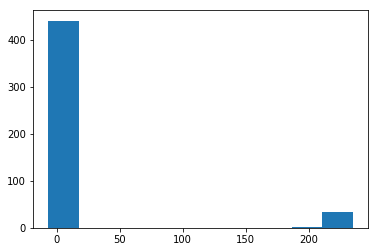

In [160]:
dx_loc_m_vxy = arr_v_xy(dx_loc_m[Ecut], x_loc[Ecut], y_loc[Ecut])
dy_loc_m_vxy = arr_v_xy(dy_loc_m[Ecut], x_loc[Ecut], y_loc[Ecut])

In [166]:
dx_loc_locit_vxy = arr_v_xy(dx_loc_locit[Ecut], x_loc[Ecut], y_loc[Ecut])
dy_loc_locit_vxy = arr_v_xy(dy_loc_locit[Ecut], x_loc[Ecut], y_loc[Ecut])

/Users/jmhaefner/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jmhaefner/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


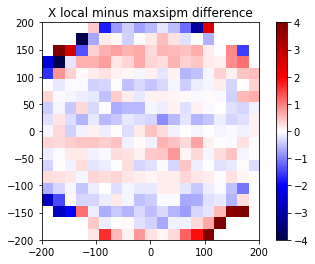

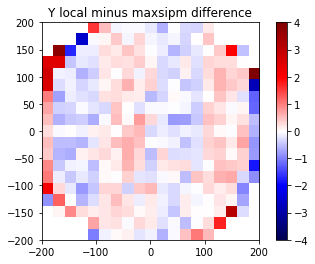

In [164]:
plt.imshow(dx_loc_m_vxy, extent=[-200, 200, -200, 200], origin = 'lower', cmap = plt.get_cmap('seismic'))
plt.colorbar()
plt.clim(-4, 4)
plt.title('X local minus maxsipm difference')
plt.show()

plt.imshow(dy_loc_m_vxy, extent=[-200, 200, -200, 200], origin = 'lower', cmap = plt.get_cmap('seismic'))
plt.colorbar()
plt.clim(-4, 4)
plt.title('Y local minus maxsipm difference')
plt.show()

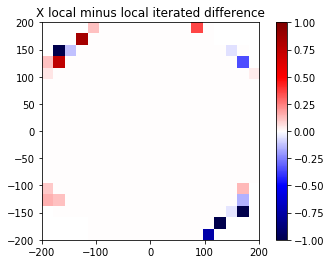

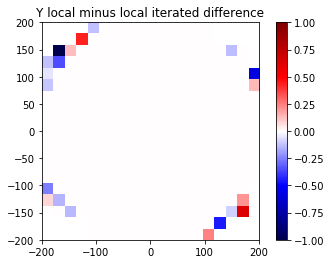

In [172]:
plt.imshow(dx_loc_locit_vxy, extent=[-200, 200, -200, 200], origin = 'lower', cmap = plt.get_cmap('seismic'))
plt.colorbar()
plt.clim(-1, 1)
plt.title('X local minus local iterated difference')
plt.show()

plt.imshow(dy_loc_locit_vxy, extent=[-200, 200, -200, 200], origin = 'lower', cmap = plt.get_cmap('seismic'))
plt.colorbar()
plt.clim(-1, 1)
plt.title('Y local minus local iterated difference')
plt.show()